# **Saudi Used Car Prediction**

> **Created by Alif Wahyu Syahnanda**

**Pre-Context :**

Dataset ini berisi 5.624 catatan mobil bekas yang dikumpulkan dari [syarah.com](https://syarah.com/). Setiap baris mewakili sebuah mobil bekas. Informasi lain mengenai setiap mobil adalah brand name, model, manufacturing year, origin, options, engine capacity, transmission type, mileage (rekam jarak tempuh), region price, and negotiable.

**Sumber dan Referensi :**
* Dataset [Saudi Used Car](https://drive.google.com/drive/folders/123QthHe9ECfB1qUFCfDinHibrNhsnZKQ)
* [Saudi Arabia Used Car Market Outlook to 2025](https://www.kenresearch.com/industry-reports/saudi-arabia-used-car-industry#details)

**Contents Brief:**
1. Background, Business Problem & Objective
1. Data Understanding
1. Data Cleaning-Preparation (Pre-Processing)
1. Analytics & Modelling (Algorithm & Evaluation Metrics)
1. Evaluation
1. Conclusion
1. Estimation & Recommendation

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import category_encoders as ce

from scipy.stats import stats, spearmanr, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.model_selection import train_test_split, StratifiedKFold

from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor, StackingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.compose import TransformedTargetRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.kernel_ridge import KernelRidge

import warnings
warnings.filterwarnings('ignore')

# **1. Background, Business Problem & Objective**

### 1. Prediksi Harga Mobil Bekas menggunakan Machine Learning

Mobil menjadi kebutuhan pokok masyarakat, namun harga mobil baru semakin tinggi dengan fitur-fitur canggih. Sebagai alternatif, banyak yang memilih mobil bekas dalam kondisi baik (Pandey, Rastogi, & Singh, 2020). Harga mobil bekas dipengaruhi oleh atribut seperti jenis bahan bakar, model transmisi, dan jarak tempuh, berbeda dengan harga mobil baru yang sudah ditentukan produsen. Proses penentuan harga mobil bekas bisa memakan waktu, sehingga machine learning hadir untuk mempermudah. Machine learning mampu belajar dari data transaksi sebelumnya untuk memprediksi harga mobil bekas (Kriswantara & Bambang, 2022).

**Sumber:**
- Pandey, A., Rastogi, V., & Singh, S. (2020). Car’s Selling Price Prediction using Random Forest Machine Learning Algorithm. 5th International Conference on Next Generation Computing Technologies (NGCT-2019).
- Kriswantara, B., & Sadikin, R. (2022). Machine Learning Used Car Price Prediction with Random Forest Regressor Model. JISICOM, 6(1), 40-49.

### 2. Peluang Pasar Saudi Arabia

Arab Saudi memiliki proyeksi pertumbuhan bisnis jual beli mobil bekas yang positif. Dengan meningkatnya pendapatan dan bertambahnya jumlah pengemudi perempuan, serta tumbuhnya pasar online jual beli mobil bekas, penjualan mobil bekas di Saudi Arabia diperkirakan naik 4.5% (GTV) dan volume penjualan meningkat 2% dari 2019-2025. Pada 2019, rasio penjualan mobil bekas terhadap mobil baru adalah 2:1.

Salah satu platform jual beli mobil bekas di Saudi Arabia adalah Syarah.com, yang menghubungkan penjual dan pembeli. Penjual menentukan harga mobil bekas sesuai kualitas mobil.

### 3. Permasalahan Harga Mobil Bekas

Ketidakpastian harga mobil bekas sering menjadi masalah bagi penjual dan pembeli. Harga mobil bekas dipengaruhi oleh faktor seperti model, tahun produksi, dan ukuran mesin. Penjual yang memasang harga terlalu tinggi atau rendah dapat mengalami kesulitan menjual atau rugi. Pembeli yang tidak mengetahui harga pasar juga kesulitan memutuskan pembelian.

**Problem Statement:**
Penjual dan pembeli mobil bekas kesulitan menentukan harga yang tepat tanpa pengetahuan memadai, menyebabkan mobil tidak terjual atau pembeli kesulitan memutuskan.

**Goals:**
Mengembangkan model prediksi harga mobil bekas berdasarkan spesifikasi mobil untuk membantu penjual dan pembeli membuat keputusan lebih cepat dalam transaksi jual beli.

**Utilization of Project:**
Model ini bisa digunakan oleh platform jual beli mobil bekas seperti Syarah.com untuk memberikan acuan harga, memudahkan penjual dan pembeli dalam menentukan harga, dan meningkatkan jumlah transaksi serta pertumbuhan bisnis mobil bekas.

**Analytic Approach:**
Menganalisis spesifikasi mobil yang mempengaruhi harga, membuat berbagai model regresi untuk menentukan harga, dan memilih model terbaik berdasarkan evaluasi metrik.

**Matrix Evaluation:**
- **Root Mean Squared Error (RMSE):** Mengukur kesalahan prediksi, memberikan bobot besar untuk kesalahan besar.
- **Mean Absolute Error (MAE):** Mengukur rata-rata kesalahan absolut antara hasil peramalan dengan nilai sebenarnya.
- **R Squared:** Menunjukkan seberapa besar variabel independen mempengaruhi variabel dependen, dengan nilai antara 0 sampai 1.

# **2. Data Understanding**

## Features Information

| Attribute | Data Type| Description |
| --- | --- | --- |
| Type | Object | Type of used car |
| Region | Object | The region in which the used car was offered for sale |
| Make | Object | Name of the car company |
| Gear_Type | Object | Automatic / Manual |
| Origin | Object | Country of importer (Gulf / Saudi / Other) |
| Options | Object | Full Options / Semi-Full / Standard |
| Year | Int | Year of Manufacturing |
| Engine_Size | Float | The engine size of used car |
| Mileage | Int | The distance that used car have travelled, measured in miles |
| Negotiable | Bool | If True, the price is 0. This means the price is negotiable (not set) |
| Price | int | Price of the used car (in SAR) |

In [2]:
df = pd.read_csv('data_saudi_used_cars.csv')
display(df.head(),df.tail())

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000
5623,ES,Jeddah,Lexus,Automatic,Other,Full,2017,3.5,115000,True,0


In [3]:
pd.set_option('display.max_colwidth', None)
print(f'Total rows {df.shape[0]}, Total Colum {df.shape[1]}')
pd.DataFrame(
    {
    'Features': df.columns.values,
    'Number of Unique': df.nunique().values,
    'Unique Sample': [df[col].unique() for col in df.columns]
    }
)

Total rows 5624, Total Colum 11


,Features,Number of Unique,Unique Sample
0,Type,347,"[Corolla, Yukon, Range Rover, Optima, FJ, CX3, Cayenne S, Sonata, Avalon, LS, C300, Land Cruiser, Hilux, Tucson, Caprice, Sunny, Pajero, Azera, Focus, 5, Spark, Camry, Pathfinder, Accent, ML, Tahoe, Yaris, Suburban, A, Altima, Traverse, Expedition, Senta fe, Liberty, 3, X, Elantra, Land Cruiser Pickup, VTC, Malibu, The 5, A8, Patrol, Grand Cherokee, SL, Previa, SEL, Aveo, MKZ, Victoria, Datsun, Flex, GLC, ES, Edge, 6, Escalade, Innova, Navara, H1, G80, Carnival, Symbol, Camaro, Accord, Avanza, Land Cruiser 70, Taurus, C5700, Impala, Optra, S, Other, Cerato, Furniture, Murano, Explorer, LX, Pick up, Charger, H6, BT-50, Hiace, Ranger, Fusion, Rav4, Ciocca, CX9, Kona, Sentra, Sierra, Durango, CT-S, Sylvian Bus, Navigator, Opirus, Marquis, The 7, FX, Creta, ...]"
1,Region,27,"[Abha, Riyadh, Hafar Al-Batin, Aseer, Makkah, Dammam, Yanbu, Al-Baha, Jeddah, Hail, Khobar, Al-Ahsa, Jazan, Al-Medina, Al-Namas, Tabouk, Taef, Qassim, Arar, Jubail, Sabya, Al-Jouf, Najran, Wadi Dawasir, Qurayyat, Sakaka, Besha]"
2,Make,58,"[Toyota, GMC, Land Rover, Kia, Mazda, Porsche, Hyundai, Lexus, Chrysler, Chevrolet, Nissan, Mitsubishi, Ford, MG, Mercedes, Jeep, BMW, Audi, Lincoln, Cadillac, Genesis, Renault, Honda, Suzuki, Zhengzhou, Dodge, HAVAL, INFINITI, Isuzu, Changan, Aston Martin, Mercury, Great Wall, Other, Rolls-Royce, MINI, Volkswagen, BYD, Geely, Victory Auto, Classic, Jaguar, Daihatsu, Maserati, Hummer, GAC, Lifan, Bentley, Chery, Peugeot, Foton, Škoda, Fiat, Iveco, SsangYong, FAW, Tata, Ferrari]"
3,Gear_Type,2,"[Manual, Automatic]"
4,Origin,4,"[Saudi, Gulf Arabic, Other, Unknown]"
5,Options,3,"[Standard, Full, Semi Full]"
6,Year,50,"[2013, 2014, 2015, 2020, 2019, 2012, 2016, 1998, 2011, 2008, 1982, 1985, 2018, 1983, 2021, 2017, 2002, 2010, 2009, 2004, 2001, 1986, 2007, 1999, 2005, 1977, 1991, 2003, 1995, 2006, 1997, 1993, 1996, 2000, 1990, 1965, 1980, 1987, 1994, 1988, 1989, 1978, 2022, 1975, 1964, 1984, 1979, 1992, 1963, 1981]"
7,Engine_Size,71,"[1.4, 8.0, 5.0, 2.4, 4.0, 2.0, 4.8, 3.5, 4.6, 5.7, 2.7, 1.0, 3.0, 1.6, 1.5, 3.3, 6.2, 2.5, 5.3, 3.6, 5.4, 1.7, 3.7, 9.0, 4.7, 4.5, 3.8, 5.5, 2.6, 1.8, 1.2, 6.0, 6.9, 3.2, 5.9, 2.2, 5.6, 1.1, 2.9, 4.1, 1.3, 4.4, 2.8, 3.4, 8.8, 6.1, 7.0, 1.9, 7.5, 4.3, 6.5, 3.1, 6.3, 6.4, 5.8, 8.5, 2.3, 6.6, 7.2, 4.2, 5.1, 7.4, 5.2, 2.1, 6.7, 7.8, 3.9, 8.7, 4.9, 6.8, 8.9]"
8,Mileage,1716,"[421000, 80000, 140000, 220000, 49000, 25000, 189000, 155, 110864, 300, 200, 79000, 299000, 17000, 209, 340000, 30000, 71000, 85000, 500000, 290, 74715, 250, 284000, 98000, 3400, 108, 350000, 550000, 204000, 139240, 296, 105920, 187000, 10000, 18500, 292000, 280000, 270000, 345500, 110000, 247000, 55800, 92000, 27000, 600000, 307801, 62000, 38000, 89000, 137000, 422000, 208000, 11000, 245000, 500, 150000, 81000, 156000, 42000, 228000, 24000, 266000, 98100, 182000, 210800, 88000, 214000, 82808, 4000, 417970, 70000, 115, 270373, 91440, 45000, 96000, 50100, 35449, 180, 66200, 100, 349000, 168000, 105000, 130000, 212000, 139740, 256, 280, 73000, 240000, 866, 216, 183000, 148000, 4358765, 188257, 117000, 160000, ...]"
9,Negotiable,2,"[True, False]"


In [4]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Type,object,0,0.0,347,"[VTC, Previa]"
1,Region,object,0,0.0,27,"[Arar, Tabouk]"
2,Make,object,0,0.0,58,"[BMW, Ferrari]"
3,Gear_Type,object,0,0.0,2,"[Manual, Automatic]"
4,Origin,object,0,0.0,4,"[Gulf Arabic, Other]"
5,Options,object,0,0.0,3,"[Full, Semi Full]"
6,Year,int64,0,0.0,50,"[1964, 1977]"
7,Engine_Size,float64,0,0.0,71,"[2.8, 3.3]"
8,Mileage,int64,0,0.0,1716,"[446, 48521]"
9,Negotiable,bool,0,0.0,2,"[False, True]"


## Duplicate Data

In [5]:
df.duplicated().any()

True

In [6]:
df.duplicated().sum()

4

In [7]:
df[df.duplicated()]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
953,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,False,25000
4646,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,False,72910
4933,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,False,45000
5267,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2013,2.5,185000,True,0


## Missing Value

<Axes: >

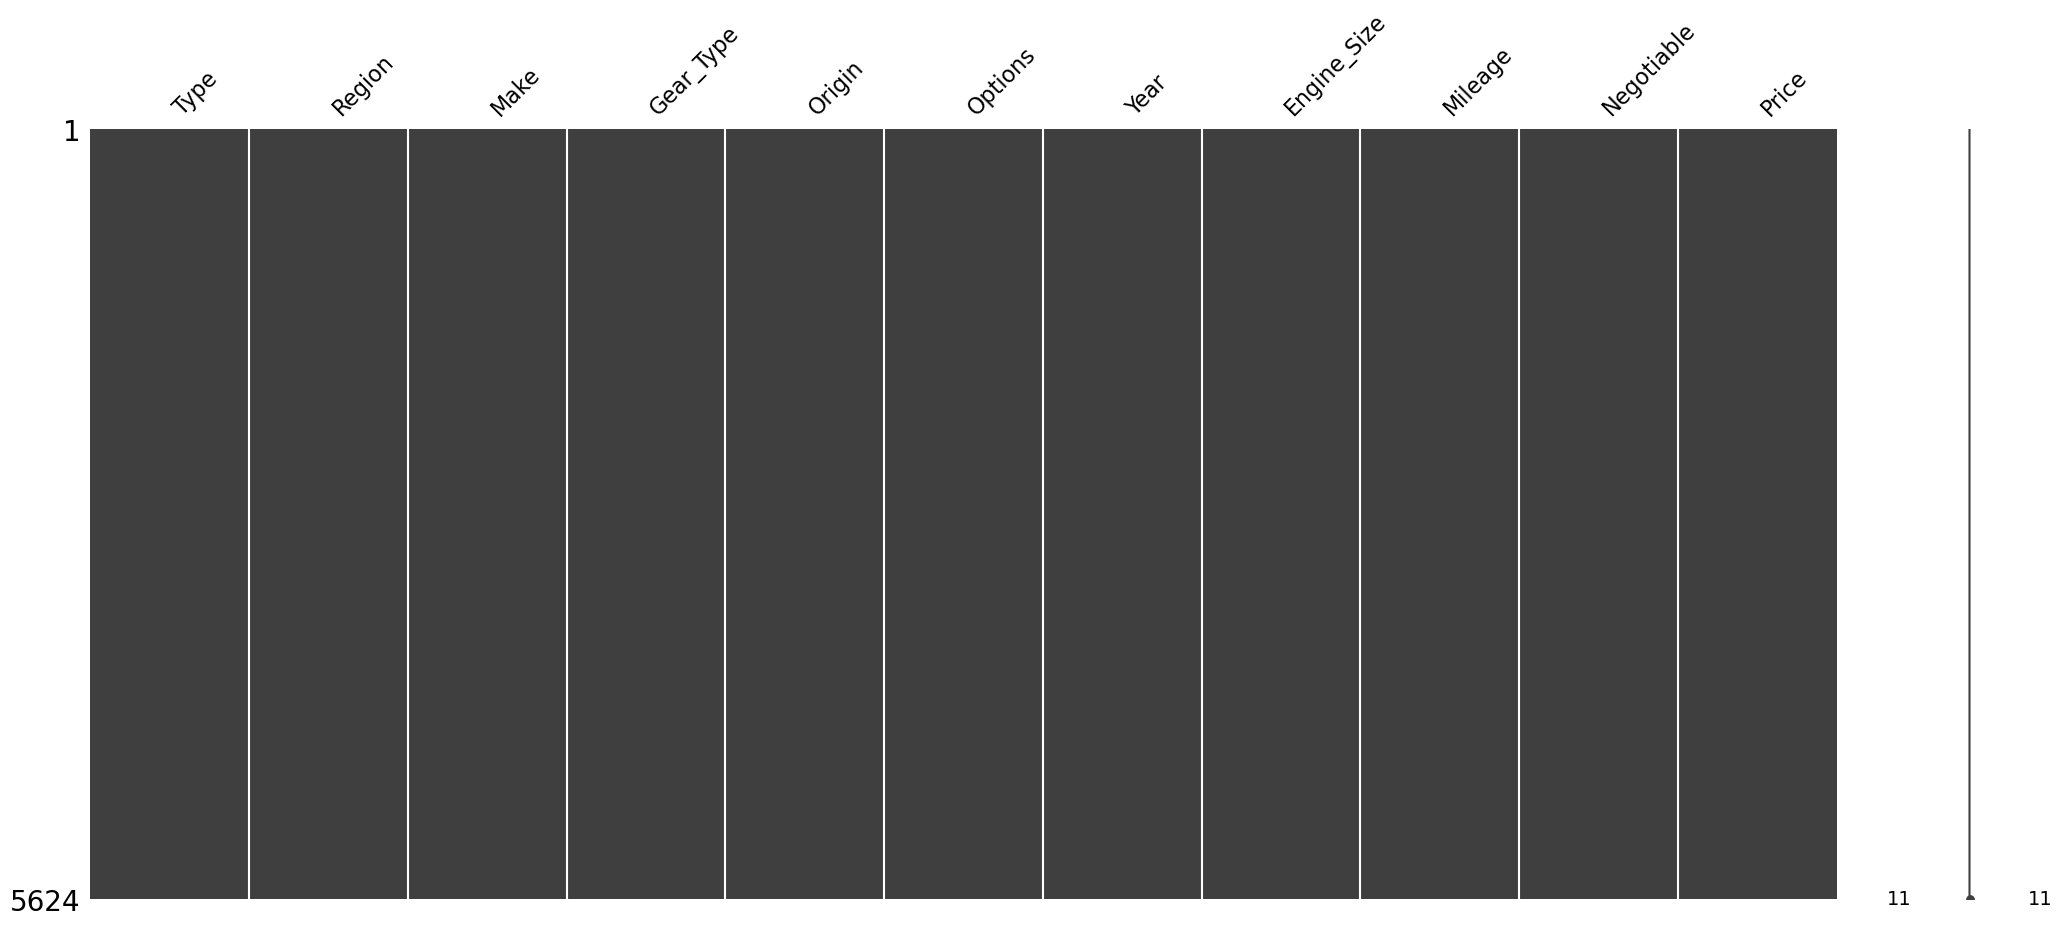

In [8]:
missingno.matrix(df)

In [9]:
df.isna().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

## Summary Data Understanding

**Data Understanding Key Poin:**
1. Data Saudi Arabia Used Car memiliki 11 kolom features dan 5624 jumlah baris data
1. Terdapat 4 duplikat data yang nantinya akan dilakukan pembersihan pada bagian Data Cleaning
1. Tidak memiliki missing value/NaN Value pada seluruh features

# **3. EDA (Exploratory Data Analysis)**

Pada bagian EDA akan dilakukan pengecekan apakah kolom data numerikal terdapat ouliers atau tidak, Data Outlier disebut juga dengan data pencilan. Pengertian dari Outlier adalah data observasi yang muncul dengan nilai-nilai ekstrim, baik secara univariat ataupun multivariat. Yang dimaksud dengan nilai-nilai ekstrim dalam observasi adalah nilai yang jauh atau beda sama sekali dengan sebagian besar nilai lain dalam kelompoknya. Dalam ilmu data, kita sering ingin membuat asumsi tentang populasi tertentu. Namun adanya nilai ekstrem dapat berdampak signifikan pada kesimpulan hasil interpretasi yang kita amati dari data atau model machine learning. Dengan deteksi dan penanganan terterntu, anomali ini dapat dilihat sebagai bagian dari populasi yang berbeda.

## Numerical Data Distribution

### Descriptive Statistic Numerical Data

In [10]:
numerikal = df.select_dtypes(include='number')
df.describe(include='number')

,Year,Engine_Size,Mileage,Price
count,5624.000000,5624.000000,5.624000e+03,5624.000000
mean,2014.101885,3.295430,1.509234e+05,53074.058144
std,5.791606,1.515108,3.828360e+05,70155.340614
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,72932.500000
max,2022.000000,9.000000,2.000000e+07,850000.000000


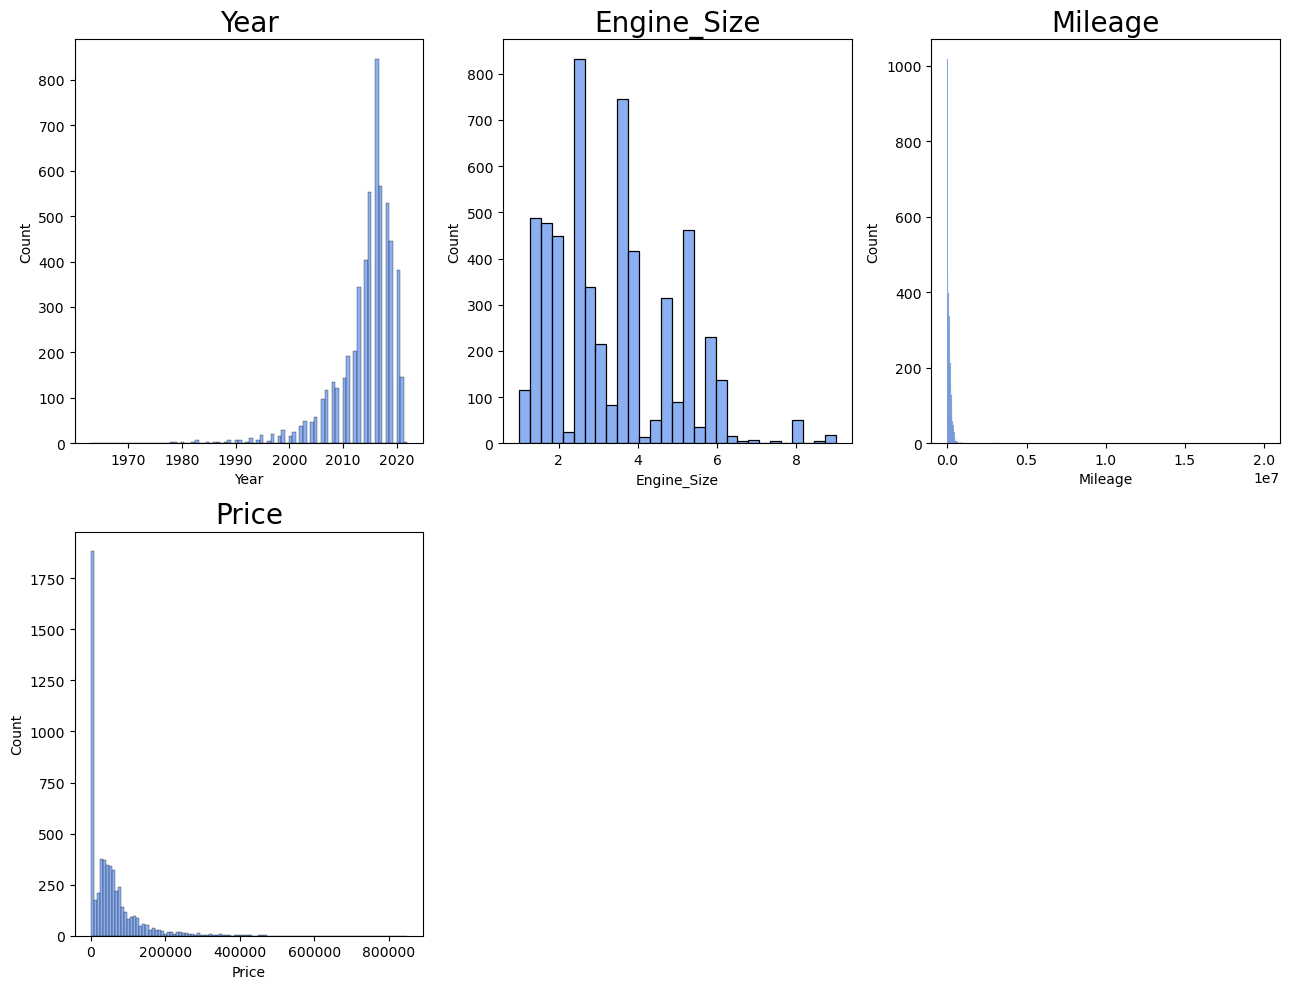

In [11]:
plt.figure(figsize=(13, 10))
plotnumber = 1
numerik = df.select_dtypes(include='number').columns

for feature in numerik:
    ax = plt.subplot(2, 3, plotnumber)
    sns.histplot(data=df,x=feature,color='cornflowerblue')
    plt.title(feature, fontsize=20)
    plotnumber += 1
    plt.tight_layout()

### Outliers

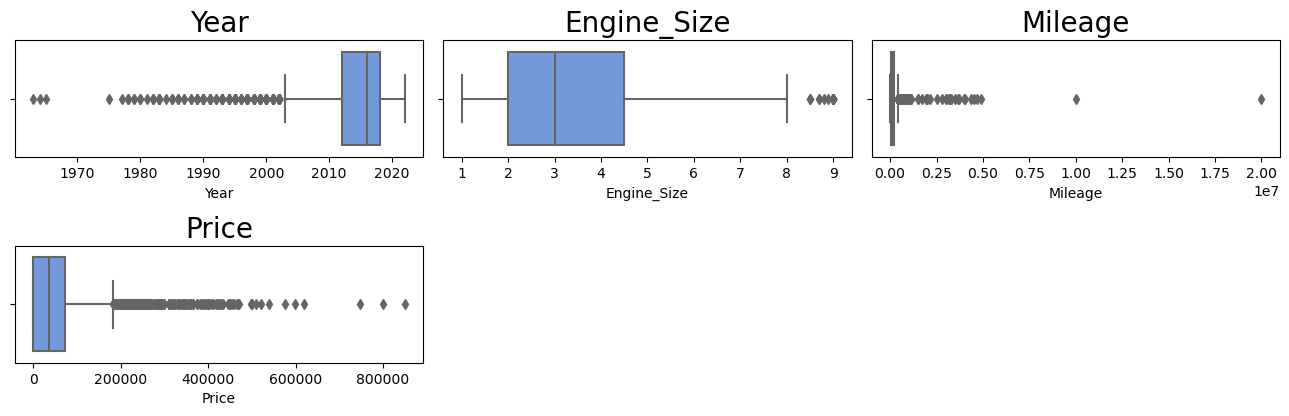

In [12]:
plt.figure(figsize=(13, 10))
plotnumber = 1
numerik = df.select_dtypes(include='number').columns

for feature in numerik:
    ax = plt.subplot(5, 3, plotnumber)
    sns.boxplot(data=df,x=feature,color='cornflowerblue')
    plt.title(feature, fontsize=20)
    plotnumber += 1
    plt.tight_layout()

In [13]:
# Menggunakan IQR untuk mendapatkan jumlah outliers

for kolom in numerikal.columns:
  q1 = numerikal[[kolom]].quantile(0.25)
  q3 = numerikal[[kolom]].quantile(0.75)
  iqr = q3 - q1
  whis = 1.5 * iqr
  upper_bound = float(q3 + whis)
  lower_bound = float(q1 - whis)

  jumlah_outliers = len(numerikal[(numerikal[kolom] < lower_bound) | (numerikal[kolom] > upper_bound)])
  print(f'{kolom} memiliki outliers {jumlah_outliers}')

Year memiliki outliers 246
Engine_Size memiliki outliers 23
Mileage memiliki outliers 175
Price memiliki outliers 261


In [14]:
numerikal[(numerikal['Price'] < lower_bound) | (numerikal['Price'] > upper_bound)]

,Year,Engine_Size,Mileage,Price
2,2015,5.0,140000,260000
17,2019,4.6,71000,200000
60,2017,4.7,81000,265000
73,2019,4.5,82808,230000
74,2020,2.0,4000,225000
...,...,...,...,...
5530,2019,3.0,14000,247000
5548,2020,6.0,13000,385000
5555,2016,4.0,42000,229000
5573,2015,4.0,157000,215000


In [15]:
df[df['Price']==0]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
9,LS,Aseer,Lexus,Automatic,Saudi,Full,1998,4.6,300,True,0
14,Hilux,Yanbu,Toyota,Automatic,Saudi,Full,2014,2.7,209,True,0
15,Land Cruiser,Aseer,Toyota,Manual,Gulf Arabic,Semi Full,1982,4.6,340000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5610,Town Car,Jeddah,Lincoln,Automatic,Other,Full,1999,5.0,343,True,0
5614,Victoria,Makkah,Ford,Automatic,Saudi,Standard,2010,4.6,345000,True,0
5617,Yukon,Jubail,GMC,Automatic,Saudi,Semi Full,2006,5.3,300,True,0
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0


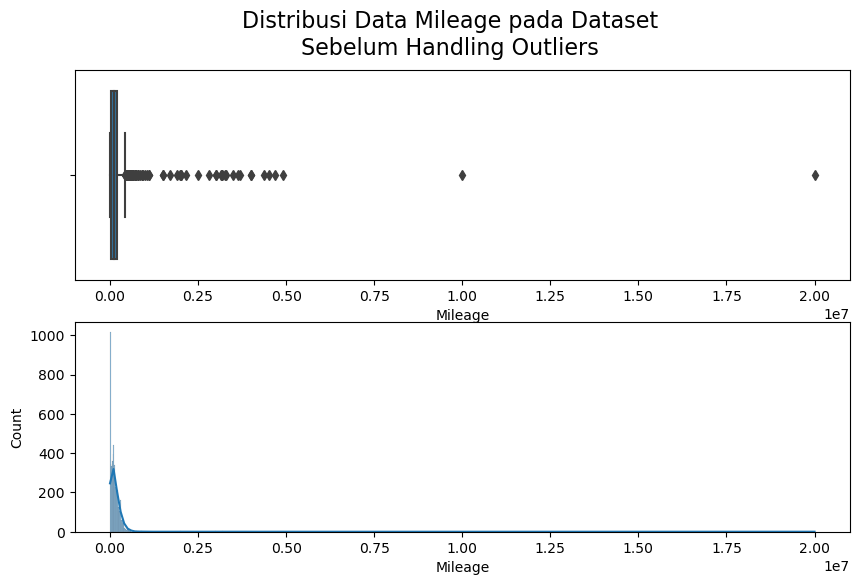

In [16]:
# Melihat distribusi data Mileage yang dinyatakan memiliki outliers
fig, [axes1,axes2] = plt.subplots(nrows= 2, ncols= 1, figsize=(10,6))

sns.boxplot(data=df, x='Mileage',ax=axes1)
sns.histplot(data=df, x='Mileage', ax=axes2,kde=True)

fig.suptitle('Distribusi Data Mileage pada Dataset\nSebelum Handling Outliers\n', size = 16)
plt.show()

**Key poin outliers :**

- **Fokus pada Outliers di Kolom Mileage**:
  - Outliers ekstrem di Mileage terdeteksi pada boxplot, sebanyak 2 data.
  - Rata-rata Mileage per tahun adalah 16.000 km (sumber: ksa.motory.com).
  - Outliers Mileage yang ekstrem akan dihilangkan.

- **Nilai Nol di Kolom Price**:
  - Boxplot menunjukkan minimum dan Q1 berada di nilai 0.
  - Data dengan Price 0 akan dihapus untuk analisis dan pemodelan.
  - Nilai Price nol terkait dengan kolom Negotiable yang bernilai True.

- **Pendekatan terhadap Outliers**:
  - Outliers tidak selalu harus dihilangkan karena bisa mengandung informasi berguna.
  - Hanya outliers ekstrem yang akan dihilangkan untuk menjaga representasi data yang sebenarnya.

- **Identifikasi Outliers Ekstrem**:
  - Terdapat 3 fitur dengan outliers ekstrem: Mileage (10 juta dan 20 juta km), Year (tahun di bawah 1970), dan Price (di atas 700.000).
  - Outliers ekstrem ini akan dihilangkan, sementara outliers lainnya akan tetap digunakan.

- **Kesimpulan**:
  - Menghilangkan hanya outliers yang sangat ekstrem untuk menjaga jumlah dan representasi data.

### Features Correlation

In [17]:
numerikal.corr(method = 'spearman')

,Year,Engine_Size,Mileage,Price
Year,1.000000,-0.299651,-0.420324,0.357960
Engine_Size,-0.299651,1.000000,0.129730,0.087668
Mileage,-0.420324,0.129730,1.000000,-0.110587
Price,0.357960,0.087668,-0.110587,1.000000


<Axes: >

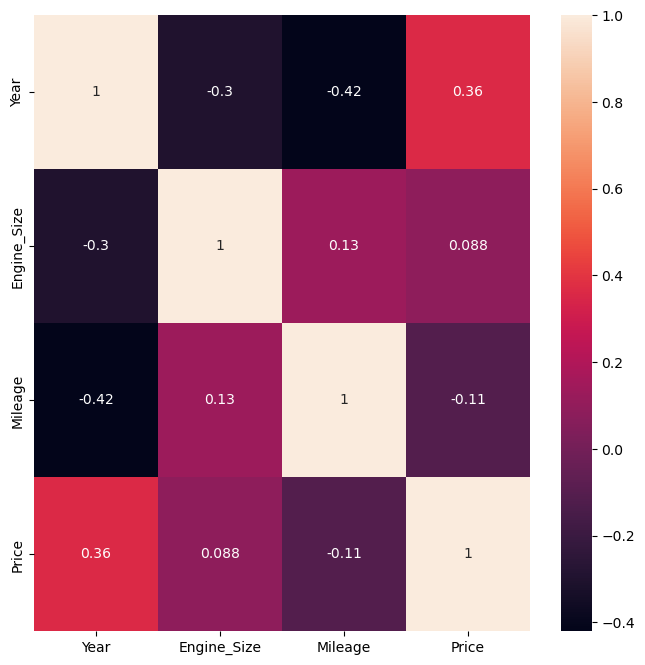

In [18]:
plt.figure(figsize=(8,8))
sns.heatmap(numerikal.corr(method = 'spearman'), annot = True)

Key poin korelasi feature:

- **Korelasi dengan Price**:
  - *Engine_Size* dan *Year* memiliki korelasi positif dengan *Price*.
  - *Mileage* memiliki korelasi negatif dengan *Price*.
  - Korelasi tertinggi dengan *Price* adalah *Year* (0.36), diikuti oleh *Engine_Size* (0.088) dan *Mileage* (-0.11).
  - Semakin baru mobil dibuat, semakin tinggi nilai *Price*.

- **Korelasi antara Year dan Mileage**:
  - Korelasi antara *Year* dan *Mileage* adalah -0.42.
  - Mobil yang lebih lama dibuat memiliki *Mileage* lebih tinggi.

- **Korelasi antara Engine_Size dan Year**:
  - Korelasi antara *Engine_Size* dan *Year* adalah -0.3.
  - Mobil yang lebih baru cenderung memiliki kapasitas mesin yang lebih rendah.

### Multicollinearity

In [19]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [20]:
calc_vif(df.select_dtypes(include='number'))

,variables,VIF
0,Year,6.013349
1,Engine_Size,5.872244
2,Mileage,1.170619
3,Price,1.628650


In [21]:
float_columns = df.select_dtypes(include='number').columns

for col in float_columns:
    corr, p_value = spearmanr(df[col], df['Price'])

    if p_value < 0.05:
        print(f"{col} vs Price:\nCorrelation: {corr:.4f} | P-value: {p_value:.4g} (significant)\n")
    else:
        print(f"{col} vs Price:\nCorrelation: {corr:.4f} | P-value: {p_value:.4g} (not significant)\n")

Year vs Price:
Correlation: 0.3580 | P-value: 1.188e-169 (significant)

Engine_Size vs Price:
Correlation: 0.0877 | P-value: 4.525e-11 (significant)

Mileage vs Price:
Correlation: -0.1106 | P-value: 9.026e-17 (significant)

Price vs Price:
Correlation: 1.0000 | P-value: 0 (significant)



### Anomalies

In [22]:
df.sort_values(by='Price')

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
2795,Land Cruiser,Qassim,Toyota,Automatic,Saudi,Full,2014,4.6,495000,True,0
2796,H1,Riyadh,Hyundai,Automatic,Other,Semi Full,2015,2.7,112000,True,0
2803,Optima,Riyadh,Kia,Automatic,Saudi,Standard,2018,2.0,11000,True,0
2804,A8,Riyadh,Audi,Automatic,Saudi,Full,2014,3.0,175,True,0
...,...,...,...,...,...,...,...,...,...,...,...
4653,Range Rover,Riyadh,Land Rover,Automatic,Other,Full,2019,5.0,4200,False,599000
2120,Ghost,Dammam,Rolls-Royce,Automatic,Saudi,Full,2016,6.0,40000,False,620000
4273,S,Dammam,Mercedes,Automatic,Gulf Arabic,Full,2021,3.0,2500,False,748000
4684,G,Riyadh,Mercedes,Automatic,Other,Full,2019,4.0,39000,False,800000


In [23]:
display(df[df['Price']==1])
display(df[df['Price']==0])

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
3131,Yukon,Jubail,GMC,Automatic,Saudi,Full,2019,5.3,50000,False,1


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
9,LS,Aseer,Lexus,Automatic,Saudi,Full,1998,4.6,300,True,0
14,Hilux,Yanbu,Toyota,Automatic,Saudi,Full,2014,2.7,209,True,0
15,Land Cruiser,Aseer,Toyota,Manual,Gulf Arabic,Semi Full,1982,4.6,340000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5610,Town Car,Jeddah,Lincoln,Automatic,Other,Full,1999,5.0,343,True,0
5614,Victoria,Makkah,Ford,Automatic,Saudi,Standard,2010,4.6,345000,True,0
5617,Yukon,Jubail,GMC,Automatic,Saudi,Semi Full,2006,5.3,300,True,0
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0


## Categorical Data Distribution

In [24]:
categorical = df.select_dtypes(exclude='number').nunique().sort_values(ascending=False)
categorical

Type          347
Make           58
Region         27
Origin          4
Options         3
Gear_Type       2
Negotiable      2
dtype: int64

### Descriptive Statistic Categorical Data

In [25]:
df.describe(exclude= 'number')

,Type,Region,Make,Gear_Type,Origin,Options,Negotiable
count,5624,5624,5624,5624,5624,5624,5624
unique,347,27,58,2,4,3,2
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full,False
freq,269,2272,1431,4875,4188,2233,3828


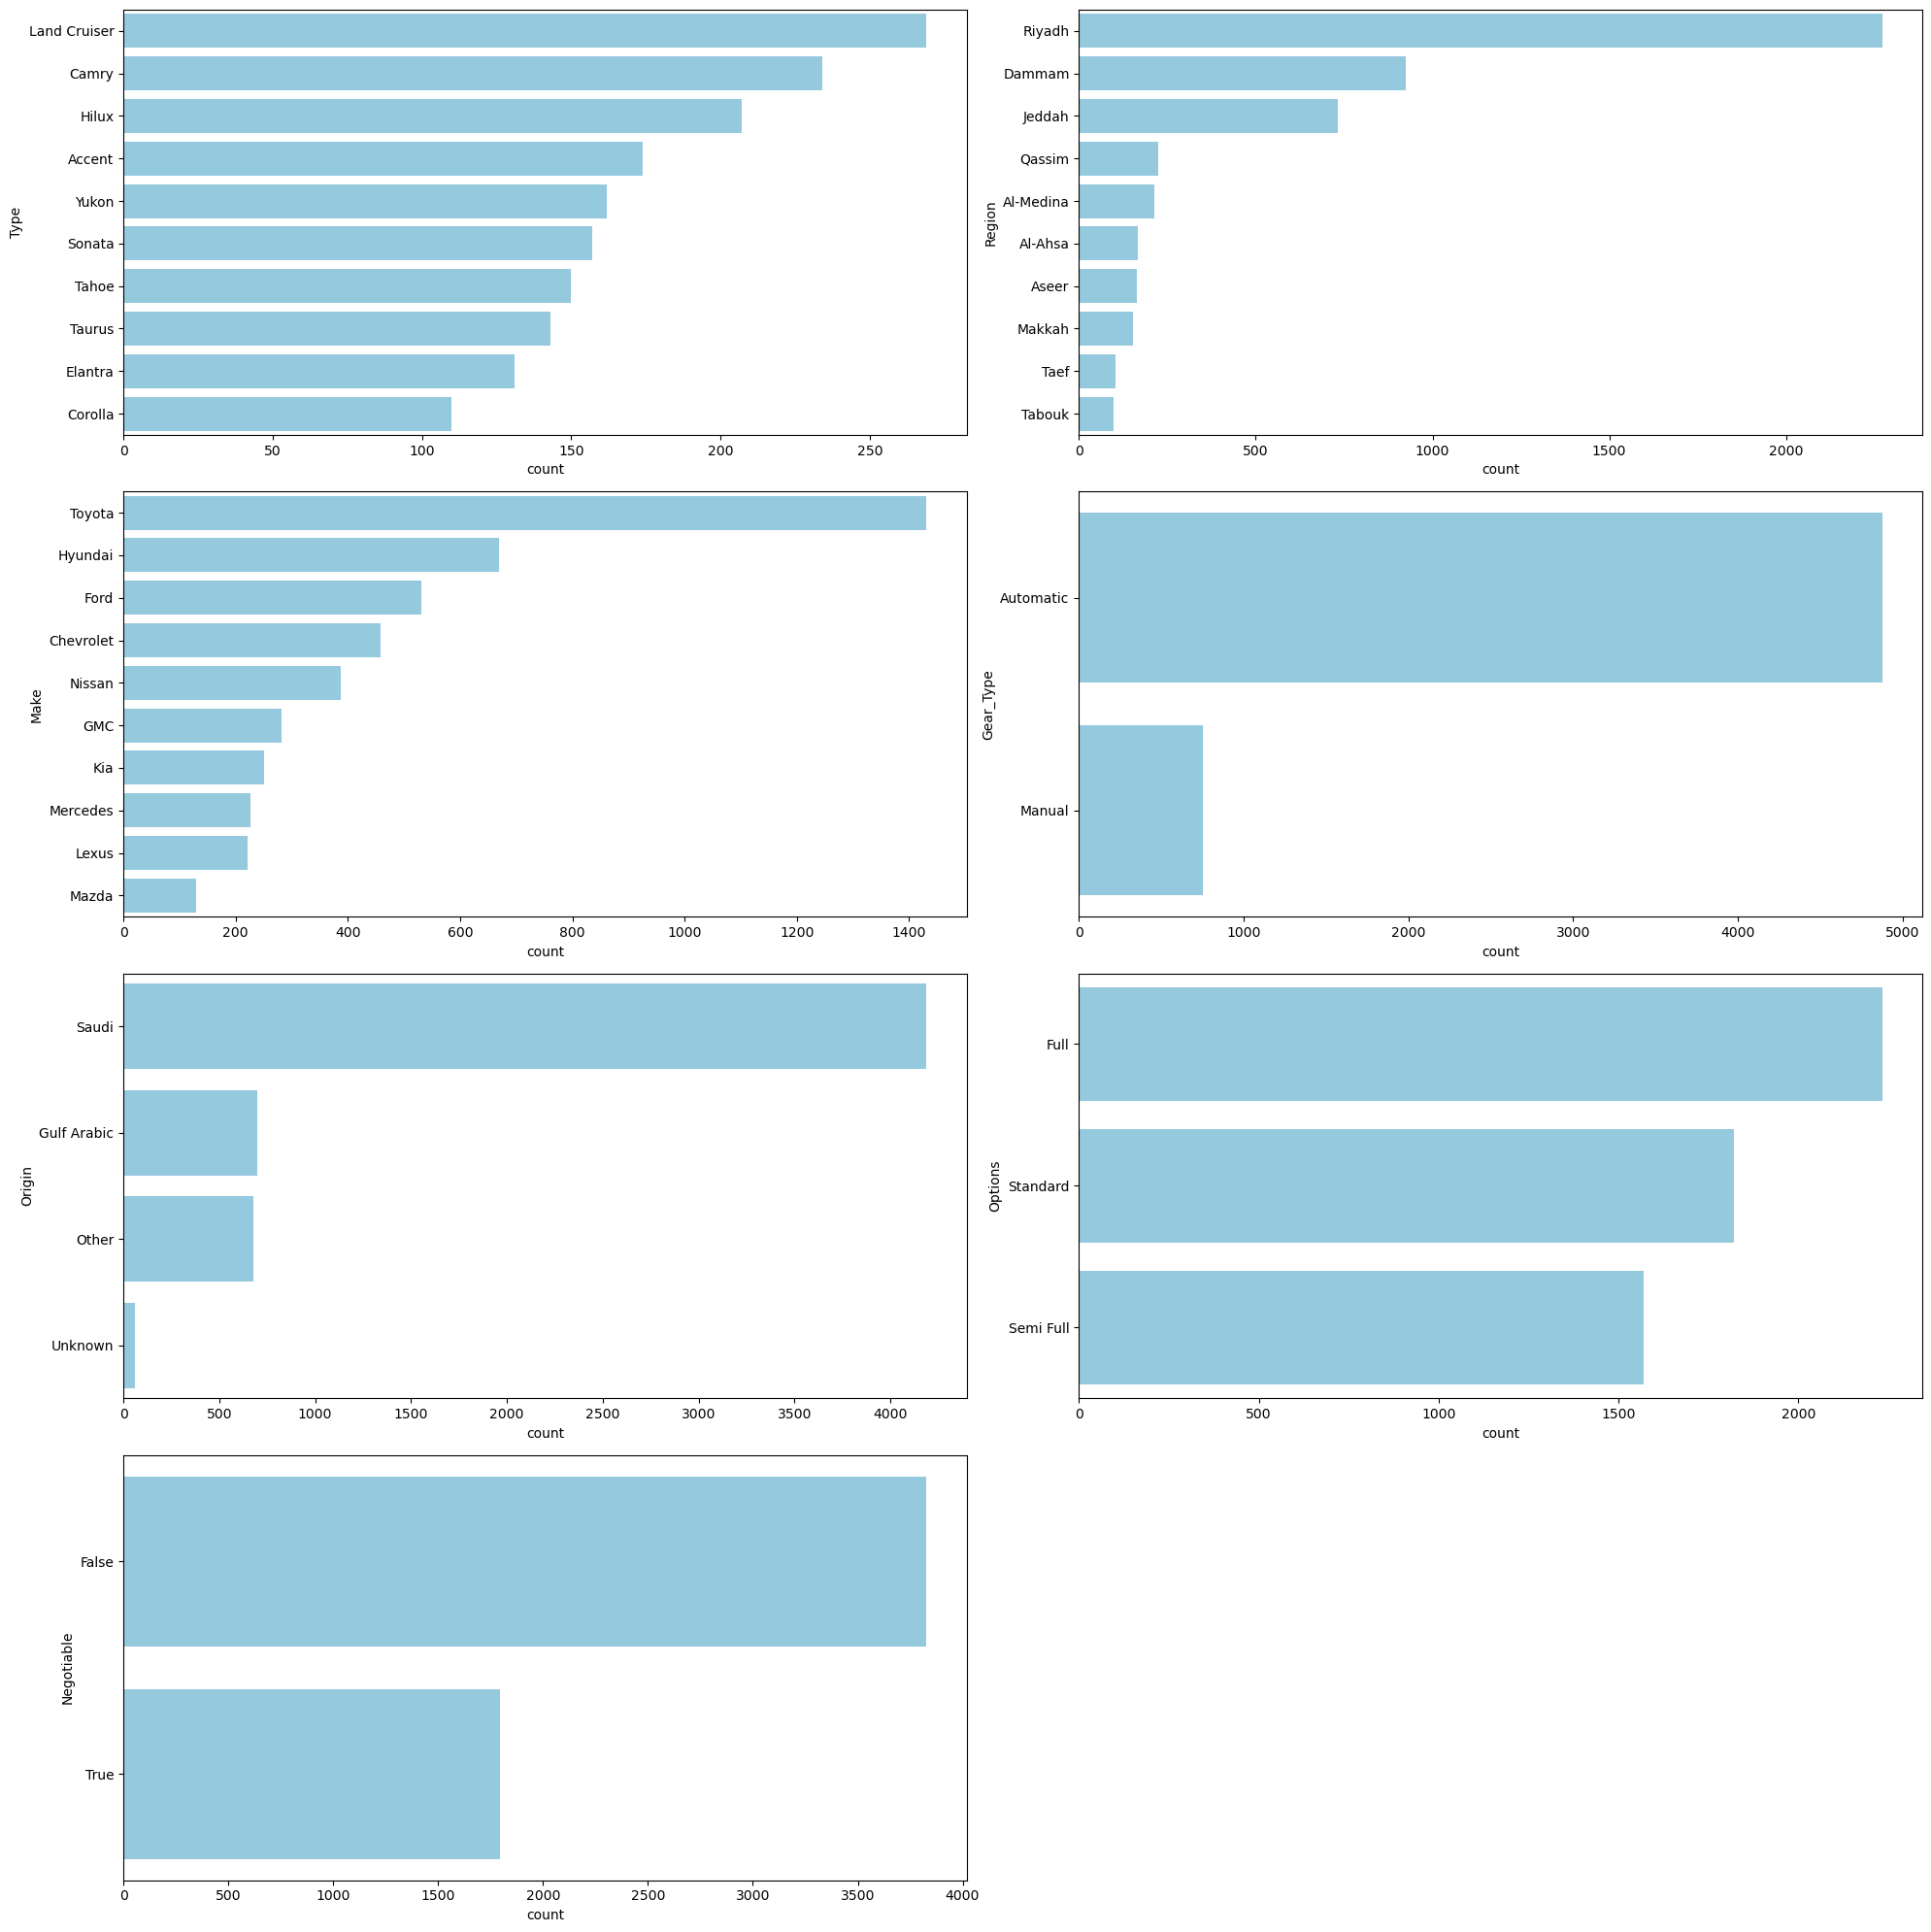

In [26]:
count = 0
fig = plt.figure(figsize=(20,20))
for kolom in df.select_dtypes(exclude='number').columns:
    count += 1
    plt.subplot(4,2,count)
    sns.countplot(y = kolom, data = df.select_dtypes(exclude='number'), order = df.select_dtypes(exclude='number')[kolom].value_counts().sort_values(ascending = False).head(10).index, color= 'skyblue')
    fig.tight_layout()
plt.show()

<Axes: xlabel='Year'>

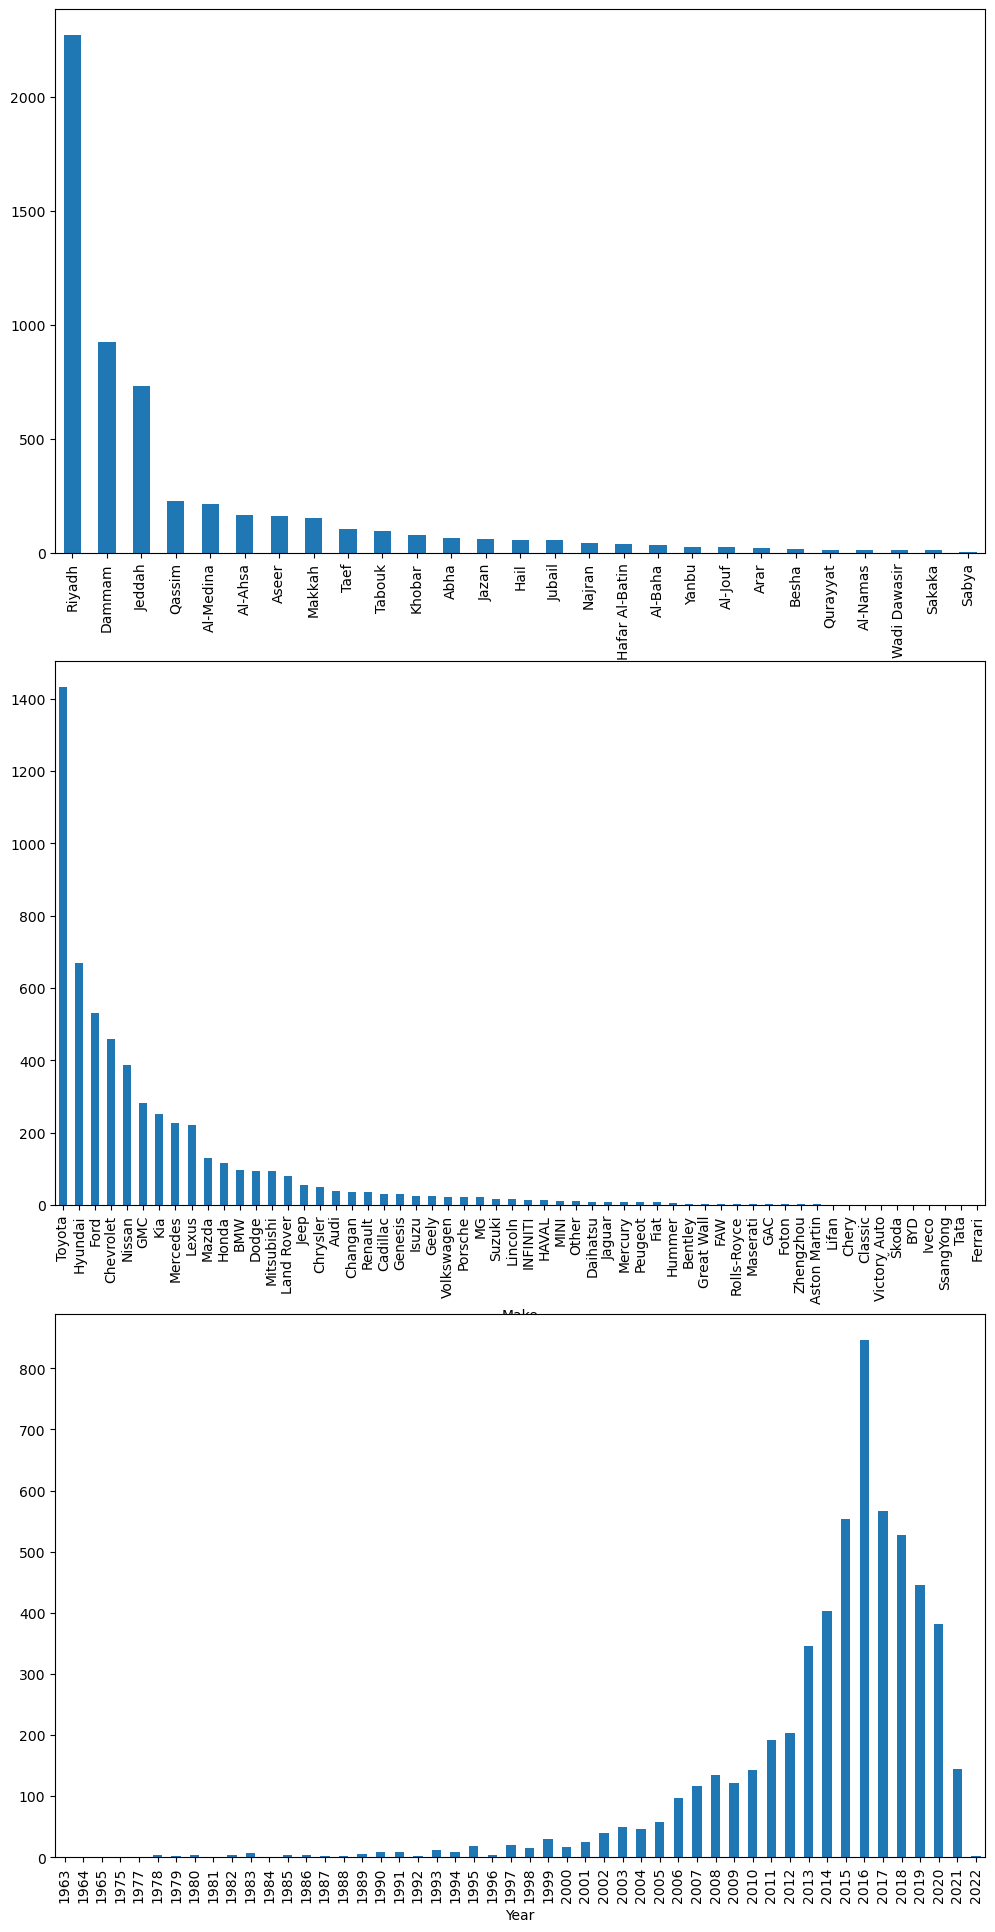

In [27]:
plt.figure(figsize=(12,24))
plt.subplot(3,1,1)
df['Region'].value_counts().plot(kind='bar')
plt.subplot(3,1,2)
df['Make'].value_counts().plot(kind='bar')
plt.subplot(3,1,3)
df['Year'].value_counts().sort_index().plot(kind='bar')

### Anomalies

In [28]:
df['Type'].unique()

array(['Corolla', 'Yukon', 'Range Rover', 'Optima', 'FJ', 'CX3',
       'Cayenne S', 'Sonata', 'Avalon', 'LS', 'C300', 'Land Cruiser',
       'Hilux', 'Tucson', 'Caprice', 'Sunny', 'Pajero', 'Azera', 'Focus',
       '5', 'Spark', 'Camry', 'Pathfinder', 'Accent', 'ML', 'Tahoe',
       'Yaris', 'Suburban', 'A', 'Altima', 'Traverse', 'Expedition',
       'Senta fe', 'Liberty', '3', 'X', 'Elantra', 'Land Cruiser Pickup',
       'VTC', 'Malibu', 'The 5', 'A8', 'Patrol', 'Grand Cherokee', 'SL',
       'Previa', 'SEL', 'Aveo', 'MKZ', 'Victoria', 'Datsun', 'Flex',
       'GLC', 'ES', 'Edge', '6', 'Escalade', 'Innova', 'Navara', 'H1',
       'G80', 'Carnival', 'Symbol', 'Camaro', 'Accord', 'Avanza',
       'Land Cruiser 70', 'Taurus', 'C5700', 'Impala', 'Optra', 'S',
       'Other', 'Cerato', 'Furniture', 'Murano', 'Explorer', 'LX',
       'Pick up', 'Charger', 'H6', 'BT-50', 'Hiace', 'Ranger', 'Fusion',
       'Rav4', 'Ciocca', 'CX9', 'Kona', 'Sentra', 'Sierra', 'Durango',
       'CT-S', 'Sylv

In [29]:
df[df['Type']=='X']

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
45,X,Jeddah,BMW,Automatic,Saudi,Full,2015,2.0,92000,False,72000
1197,X,Riyadh,BMW,Automatic,Other,Standard,2020,3.0,20000,False,257000
1410,X,Riyadh,BMW,Automatic,Saudi,Full,2018,2.0,47000,True,0
1620,X,Dammam,BMW,Automatic,Saudi,Full,2011,5.0,205000,True,0
1700,X,Dammam,BMW,Automatic,Gulf Arabic,Semi Full,2017,3.0,71000,False,170000
1757,X,Khobar,BMW,Automatic,Saudi,Full,2014,4.4,124000,True,0
1956,X,Riyadh,BMW,Automatic,Other,Full,2011,3.0,290,False,48000
2204,X,Riyadh,BMW,Automatic,Gulf Arabic,Full,2015,1.6,72000,False,170000
2208,X,Riyadh,BMW,Automatic,Saudi,Semi Full,2015,4.3,168000,True,0
2257,X,Riyadh,BMW,Automatic,Saudi,Full,2014,8.0,222000,True,0


In [30]:
df['Origin'].unique()

array(['Saudi', 'Gulf Arabic', 'Other', 'Unknown'], dtype=object)

In [31]:
df[df['Origin']=='Unknown']

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
63,Land Cruiser Pickup,Qassim,Nissan,Manual,Unknown,Full,2016,4.8,42000,True,0
133,Land Cruiser,Riyadh,Toyota,Automatic,Unknown,Full,2014,4.6,191000,True,0
252,CX9,Abha,Mazda,Automatic,Unknown,Full,2012,2.5,377836,True,0
253,Sorento,Jubail,Kia,Automatic,Unknown,Semi Full,2015,3.3,133981,True,0
276,Charger,Riyadh,Dodge,Automatic,Unknown,Full,2020,3.6,9120,False,115000
...,...,...,...,...,...,...,...,...,...,...,...
5350,Sonata,Al-Ahsa,Hyundai,Automatic,Unknown,Semi Full,2016,2.4,258000,False,38000
5413,Camry,Riyadh,Toyota,Automatic,Unknown,Standard,2016,2.5,254000,True,0
5449,Land Cruiser,Tabouk,Toyota,Manual,Unknown,Full,1995,4.6,300000,False,20000
5481,Elantra,Al-Jouf,Hyundai,Automatic,Unknown,Standard,2016,2.0,120000,True,0


### Categorical Significance Data Test

**ANOVA**: Categorical vs Numerical Continous

In [32]:
categorical_columns = df.select_dtypes(exclude='number')


for col in categorical_columns:
    grouped = df.groupby(col)['Price']
    anova_results = stats.f_oneway(*[group for name, group in grouped])
    print(f'{col}: F-statistic={anova_results.statistic:.2f}, p-value={anova_results.pvalue:.4f}')
    
    # Interpretation of the p-value
    if anova_results.pvalue < 0.05:
        print(f"Significant.\n")
    else:
        print(f"Not Significant.\n")

Type: F-statistic=7.19, p-value=0.0000
Significant.

Region: F-statistic=10.24, p-value=0.0000
Significant.

Make: F-statistic=28.00, p-value=0.0000
Significant.

Gear_Type: F-statistic=111.15, p-value=0.0000
Significant.

Origin: F-statistic=45.12, p-value=0.0000
Significant.

Options: F-statistic=137.85, p-value=0.0000
Significant.

Negotiable: F-statistic=2064.30, p-value=0.0000
Significant.



## Normality Check

Normality check ini diperlukan untuk menentukan scaler yang akan dipakai saat melakukan scaling data

In [33]:
numerikal.nunique()

Year             50
Engine_Size      71
Mileage        1716
Price           467
dtype: int64

In [34]:
listpvalue = []
listStatusNormal = []
listKolom = ['Year','Engine_Size','Mileage','Price']
for i in listKolom :
    stat,pvalue=shapiro(df[i])
    if pvalue<=0.05:
        status = 'Distribusi Data Tidak Normal'
    else: 
        status = 'Distribusi Data Normal' 
    listpvalue.append(pvalue)
    listStatusNormal.append(status)

In [35]:
Normalitas = pd.DataFrame({
    'Column Name' : listKolom,
    'Pvalue' : listpvalue,
    'Status Normalitas' : listStatusNormal
})
Normalitas

,Column Name,Pvalue,Status Normalitas
0,Year,0.000000e+00,Distribusi Data Tidak Normal
1,Engine_Size,1.177091e-43,Distribusi Data Tidak Normal
2,Mileage,0.000000e+00,Distribusi Data Tidak Normal
3,Price,0.000000e+00,Distribusi Data Tidak Normal


### Year Features

In [36]:
shapiro_test = shapiro(df['Year'])
print("Shapiro-Wilk Test:")
print("Statistic:", shapiro_test[0], "p-value:", shapiro_test[1])

# Interpret the p-value
alpha = 0.05
if shapiro_test[1] > alpha:
    print('Distribusi normal(fail to reject H0)')
else:
    print('Tidak berdistribusi normal (reject H0)')

Shapiro-Wilk Test:
Statistic: 0.8024682998657227 p-value: 0.0
Tidak berdistribusi normal (reject H0)


### Engine_Size Features

In [37]:
shapiro_test = shapiro(df['Engine_Size'])
print("Shapiro-Wilk Test:")
print("Statistic:", shapiro_test[0], "p-value:", shapiro_test[1])

# Interpret the p-value
alpha = 0.05
if shapiro_test[1] > alpha:
    print('Distribusi normal(fail to reject H0)')
else:
    print('Tidak berdistribusi normal (reject H0)')

Shapiro-Wilk Test:
Statistic: 0.9371076822280884 p-value: 1.1770907100328463e-43
Tidak berdistribusi normal (reject H0)


### Mileage Features

In [38]:
shapiro_test = shapiro(df['Mileage'])
print("Shapiro-Wilk Test:")
print("Statistic:", shapiro_test[0], "p-value:", shapiro_test[1])

# Interpret the p-value
alpha = 0.05
if shapiro_test[1] > alpha:
    print('Distribusi normal(fail to reject H0)')
else:
    print('Tidak berdistribusi normal (reject H0)') 

Shapiro-Wilk Test:
Statistic: 0.19930905103683472 p-value: 0.0
Tidak berdistribusi normal (reject H0)


### Price Features

In [39]:
shapiro_test = shapiro(df['Price'])
print("Shapiro-Wilk Test:")
print("Statistic:", shapiro_test[0], "p-value:", shapiro_test[1])

# Interpret the p-value
alpha = 0.05
if shapiro_test[1] > alpha:
    print('Distribusi normal(fail to reject H0)')
else:
    print('Tidak berdistribusi normal (reject H0)')

Shapiro-Wilk Test:
Statistic: 0.7167230844497681 p-value: 0.0
Tidak berdistribusi normal (reject H0)


### Result Normaility Test

Rangkuman hasil uji normalitas menggunakan Shapiro-Wilk Test pada seluruh fitur numerik :
1. Menghasilkan nilai PVALUE < 0.05 yang mana **Distribusi data setiap fitur yang diuji terbukti tidak normal**
1. Scaler yang digunakan yakni **RobustScaler()**, dikarenakan data memiliki banyak outlier dan tidak normal distribusi datanya

## Summary EDA

Ringkasan hasil EDA (Exloratory Data Analysis):

1. Dari tabel di atas terlihat bahwa pada kolom **Origin** terdapat nilai 'Unknown', nilai ini akan dimasukkan ke dalam nilai 'Other', yang artinya negara pengimpor tidak diketahui.
1. Pada kolom **Type** dan **Make** terdapat data unik dengan nama 'Other', selanjutnya kita akan mengecek data Other ini apakah mempengaruhi nilai **Price**.
1. Nilai maksimum dari **Mileage** adalah 20.000.000, nilai ini terlalu besar dan tidak mungkin terjadi, hal ini mengindikasikan adanya pencilan pada kolom **Mileage**. Kita akan menggunakan metode IQR untuk menghapus nilai pencilan dalam data **Mileage**.
1. Nilai **Price** dimana q1 adalah 0. Nilai 0 dari harga dihasilkan oleh penjualan mobil yang dapat dinegosiasikan.
1. Beberapa hal tersebut dapat menjadi masalah ketika membuat model untuk memprediksi harga mobil, jadi akan diperbaiki pada proses Data Cleaning.
1. Semua features dipakai karena terbukti signifikan.
1. Scaler menggunakan RobustScaler() karena data distribusi tidak normal dan banyak outlier.
1. Multicollinearity VIF value diterima karena nilai VIF tidak lebih dari 70% dan signifikansi antar feature terbukti berhubungan secara signifikan.

# **4. Data Cleaning**

## Handling Duplicate Data

In [40]:
print("Number of duplicate rows: ", sum(df.duplicated()))
df.drop_duplicates(inplace=True)
print("Number of duplicate rows: ", sum(df.duplicated()))

Number of duplicate rows:  4
Number of duplicate rows:  0


## Recategorize

Pada case ini recategorize dilakukan pada feature kategorikal **Origin** dan **Type**.
- Pada feature **Origin** akan dilakukan perubahan pada value 'Unknown' ke 'Other' agar memberikan kejelasan pada label
- Pada feature **Type** karena pada feature tersebut terdapat nilai unique yang banyak sehingga dapat memperberat proses komputasi setelah di encode. Recategorize dilakukan dengan mengubah variabel nilai unique dengan jumlah sedikit dari kedua kolom tersebut menjadi other. (dilakukan jika model buruk)

### Origin Feature

In [41]:
df['Origin'].value_counts()

Origin
Saudi          4184
Gulf Arabic     697
Other           678
Unknown          61
Name: count, dtype: int64

In [42]:
df['Origin'] = df['Origin'].replace(['Unknown'],'Other')

In [43]:
df['Origin'].value_counts()

Origin
Saudi          4184
Other           739
Gulf Arabic     697
Name: count, dtype: int64

### Type Feature* 

*(dilakukan bila hasil model kurang baik)

In [83]:
def Type_change(x): #mengubah isi data dari kolom type
    if x in ['Land Cruiser', 'Camry', 'Hilux', 'Accent', 'Yukon', 'Sonata', 'Tahoe', 'Taurus', 'Elantra', 'Corolla',
             'Expedition', 'Furniture', 'Suburban', 'Prado', 'Patrol', 'Accord', 'S', 'Range Rover', 'ES', 'Yaris',
             'Sunny', 'LX', 'Pajero', 'Sierra', 'Land Cruiser Pickup', 'Charger', 'Datsun', 'Caprice', 'FJ', 'Innova', 'Marquis']:
        return x
    else :
        return 'Other'

In [ ]:
# df['Type'] = df['Type'].apply(Type_change) # melakukan recategorize pada kolom type (dilakukan saat model kurang bagus setelah tuning)

In [66]:
used_car_others = df[(df['Make']=='Other')&(df['Type']=='Other')]
used_car_others.Price.describe()

count        10.000000
mean      58350.000000
std      117361.277449
min           0.000000
25%           0.000000
50%        1000.000000
75%       20875.000000
max      330000.000000
Name: Price, dtype: float64

## Handling Outliers

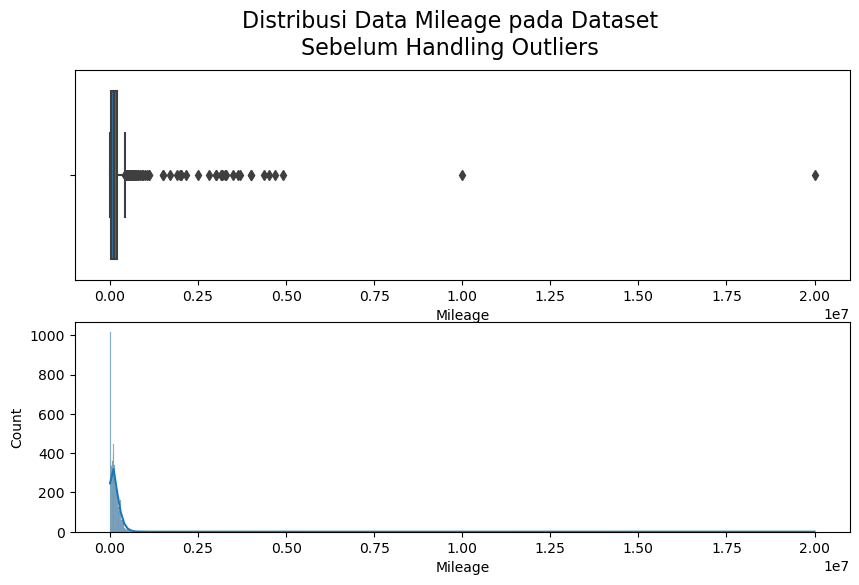

In [44]:
# Melihat distribusi data Mileage yang dinyatakan memiliki outliers
fig, [axes1,axes2] = plt.subplots(nrows= 2, ncols= 1, figsize=(10,6))

sns.boxplot(data=df, x='Mileage',ax=axes1)
sns.histplot(data=df, x='Mileage', ax=axes2,kde=True)

fig.suptitle('Distribusi Data Mileage pada Dataset\nSebelum Handling Outliers\n', size = 16)
plt.show()

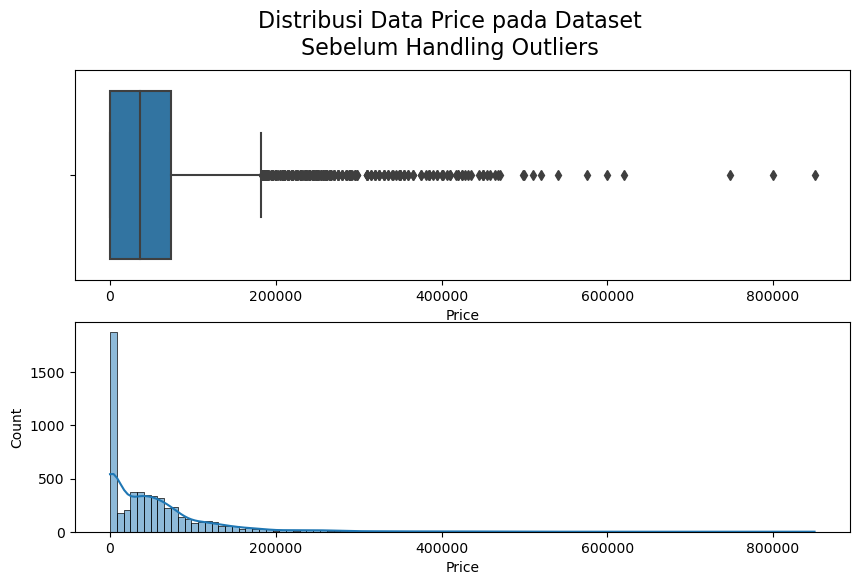

In [45]:
# Melihat distribusi data Price yang dinyatakan memiliki outliers
fig, [axes1,axes2] = plt.subplots(nrows= 2, ncols= 1, figsize=(10,6))

sns.boxplot(data=df, x='Price',ax=axes1)
sns.histplot(data=df, x='Price', ax=axes2,kde=True)

fig.suptitle('Distribusi Data Price pada Dataset\nSebelum Handling Outliers\n', size = 16)
plt.show()

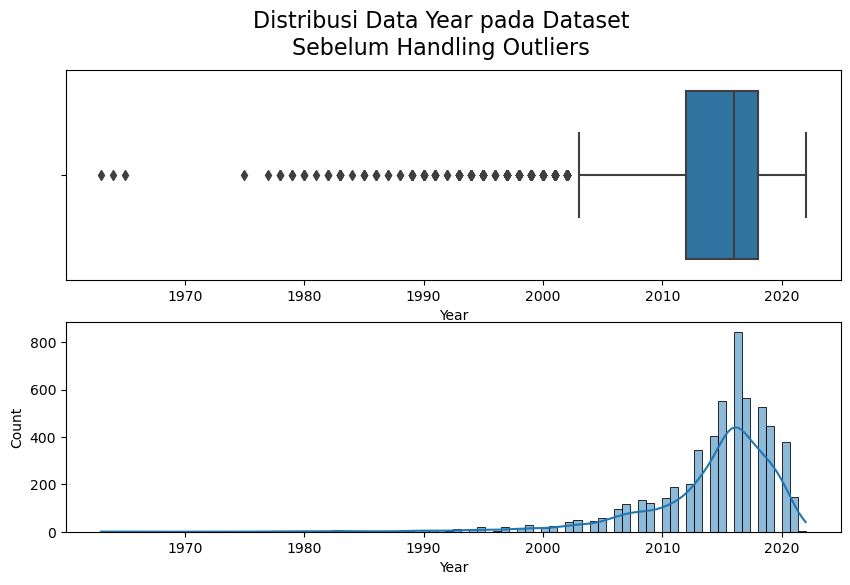

In [46]:
# Melihat distribusi data Year yang dinyatakan memiliki outliers
fig, [axes1,axes2] = plt.subplots(nrows= 2, ncols= 1, figsize=(10,6))

sns.boxplot(data=df, x='Year',ax=axes1)
sns.histplot(data=df, x='Year', ax=axes2,kde=True)

fig.suptitle('Distribusi Data Year pada Dataset\nSebelum Handling Outliers\n', size = 16)
plt.show()

In [47]:
df[df['Mileage'] >= 7500000]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
1224,POS24,Aseer,Mercedes,Manual,Other,Full,1983,8.0,9999999,True,0
3403,Optra,Riyadh,Chevrolet,Manual,Other,Semi Full,2009,1.6,20000000,False,9000


In [48]:
df[df['Price']>= 700000]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
3513,Bentayga,Dammam,Bentley,Automatic,Saudi,Full,2019,6.0,13000,False,850000
4273,S,Dammam,Mercedes,Automatic,Gulf Arabic,Full,2021,3.0,2500,False,748000
4684,G,Riyadh,Mercedes,Automatic,Other,Full,2019,4.0,39000,False,800000


In [49]:
df[df['Year'] <= 1970]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
617,Thunderbird,Riyadh,Ford,Automatic,Other,Full,1965,8.0,25000,True,0
2262,Impala,Al-Ahsa,Chevrolet,Automatic,Other,Full,1964,1.2,100000,False,75000
5012,Other,Riyadh,Ford,Manual,Saudi,Standard,1963,1.0,300,False,22000


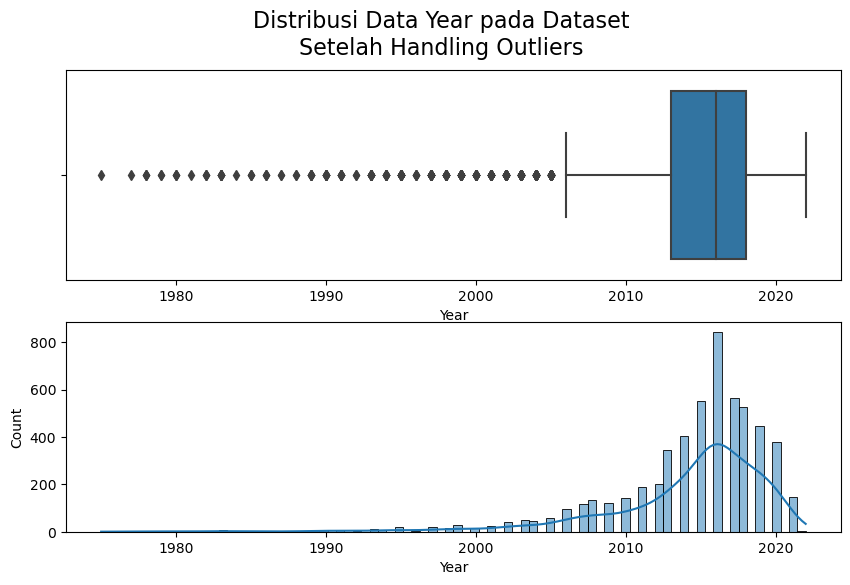

In [50]:
# Drop Outliers ekstrim dari kolom Year
df = df.drop(df[df['Year'] <= 1970].index)

# Melihat distribusi data Year yang dinyatakan memiliki outliers
fig, [axes1,axes2] = plt.subplots(nrows= 2, ncols= 1, figsize=(10,6))

sns.boxplot(data=df, x='Year',ax=axes1)
sns.histplot(data=df, x='Year', ax=axes2,kde=True)

fig.suptitle('Distribusi Data Year pada Dataset\nSetelah Handling Outliers\n', size = 16)
plt.show()

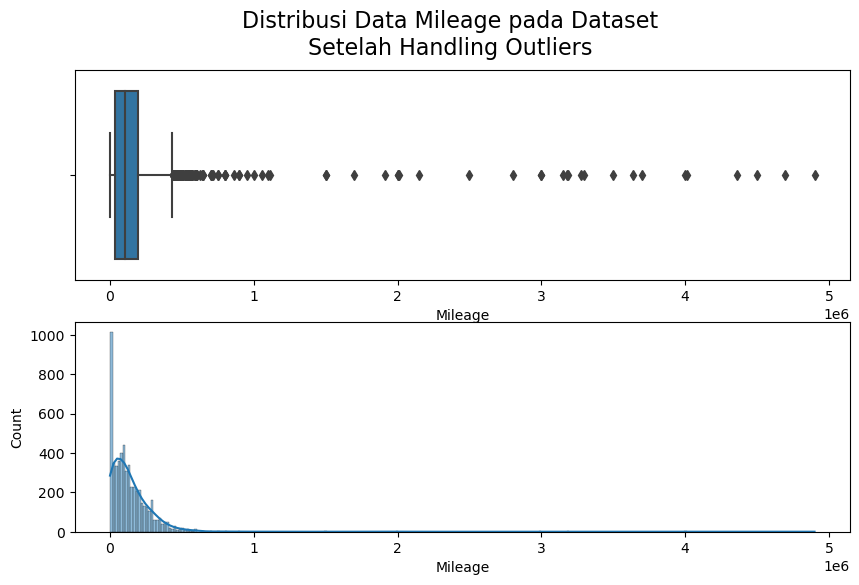

In [51]:
# Drop Outliers ekstrim dari kolom Mileage
df = df.drop(df[df['Mileage'] >= 7500000].index)

# Melihat distribusi data Mileage yang dinyatakan memiliki outliers
fig, [axes1,axes2] = plt.subplots(nrows= 2, ncols= 1, figsize=(10,6))

sns.boxplot(data=df, x='Mileage',ax=axes1)
sns.histplot(data=df, x='Mileage', ax=axes2,kde=True)

fig.suptitle('Distribusi Data Mileage pada Dataset\nSetelah Handling Outliers\n', size = 16)
plt.show()

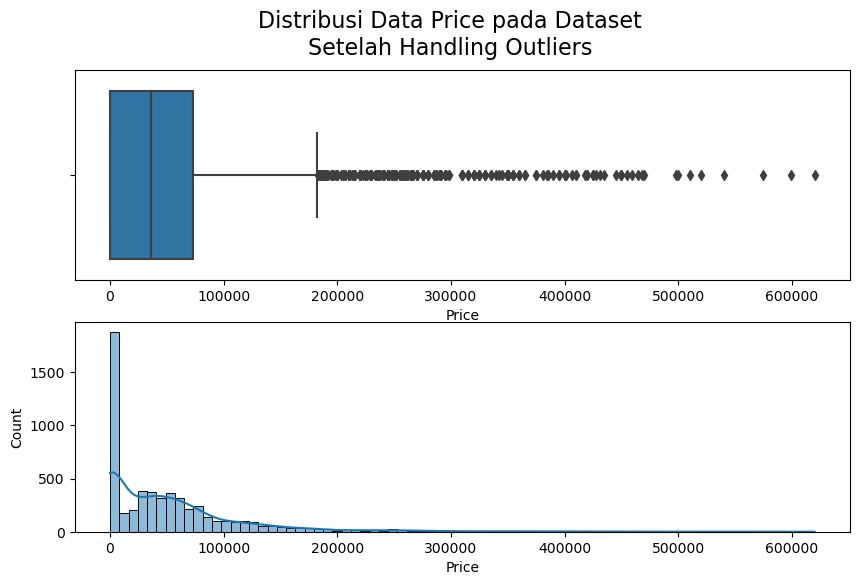

In [52]:
# Drop Outliers ekstrim dari kolom Price
df = df.drop(df[df['Price']>= 700000].index)

# Melihat distribusi data Price yang dinyatakan memiliki outliers
fig, [axes1,axes2] = plt.subplots(nrows= 2, ncols= 1, figsize=(10,6))

sns.boxplot(data=df, x='Price',ax=axes1)
sns.histplot(data=df, x='Price', ax=axes2,kde=True)

fig.suptitle('Distribusi Data Price pada Dataset\nSetelah Handling Outliers\n', size = 16)
plt.show()

## Handling Anomalies

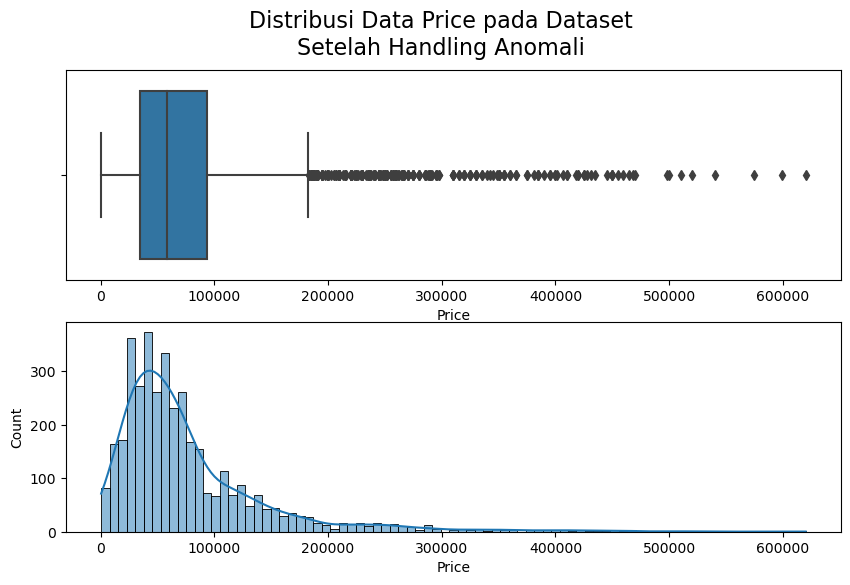

In [53]:
# Drop data anomali price 0
df = df.drop(df[df['Price']==0].index)
df = df.drop(df[df['Price']==1].index)

# Melihat distribusi data Price yang dinyatakan memiliki Anomali
fig, [axes1,axes2] = plt.subplots(nrows= 2, ncols= 1, figsize=(10,6))

sns.boxplot(data=df, x='Price',ax=axes1)
sns.histplot(data=df, x='Price', ax=axes2,kde=True)

fig.suptitle('Distribusi Data Price pada Dataset\nSetelah Handling Anomali\n', size = 16)
plt.show()

## Summary Data Cleaning

1. Data duplikat telah dilakukan penghapusan/pembersihan
1. Recategorisasi data unknown menjadi other pada feature origin
1. Melakukan penghapusan outlier dan data anomali
1. Total baris jumlah data yang ada setelah dilakukan cleaning menjadi 3817 baris/entries
1. 32,3% data telah dihapus dan dibersihkan

In [55]:
# Saving data yang telah dilakukan data cleaning

df.to_csv('Saudi_Arabia_UsedCar_Clean.csv', index=False)

# **5. Data Preparation(Pre-Processing)**

In [3]:
dfo = pd.read_csv('data_saudi_used_cars.csv')
dfo['Origin'] = dfo['Origin'].replace(['Unknown'],'Other')
dfo = dfo.drop(dfo[dfo['Price']==1].index)

In [6]:
dfc = pd.read_csv('Saudi_Arabia_UsedCar_Clean.csv')
display(dfc.head(),dfc.tail())

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
1,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
2,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
3,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
4,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
3812,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,False,132000
3813,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,False,50000
3814,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
3815,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
3816,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


In [58]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3817 non-null   object 
 1   Region       3817 non-null   object 
 2   Make         3817 non-null   object 
 3   Gear_Type    3817 non-null   object 
 4   Origin       3817 non-null   object 
 5   Options      3817 non-null   object 
 6   Year         3817 non-null   int64  
 7   Engine_Size  3817 non-null   float64
 8   Mileage      3817 non-null   int64  
 9   Negotiable   3817 non-null   bool   
 10  Price        3817 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 302.1+ KB


## Feature Engineering

### Encoding and Scaling

In [8]:
# Encode object data and Scale numeric data
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first',handle_unknown='ignore'), ['Gear_Type', 'Origin', 'Options','Negotiable']),
    ('Binary', ce.BinaryEncoder(), ['Type','Make','Region']),
    ('rob', RobustScaler(), ['Year','Engine_Size','Mileage'])
], remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('One Hot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['Gear_Type', 'Origin', 'Options',
                                  'Negotiable']),
                                ('Binary', BinaryEncoder(),
                                 ['Type', 'Make', 'Region']),
                                ('rob', RobustScaler(),
                                 ['Year', 'Engine_Size', 'Mileage'])])

## Compare Data With Outlier and Without Outlier

In [9]:
X_clean = dfc.drop('Price', axis=1)
y_clean = dfc['Price']

X_outlier = dfo.drop('Price', axis=1)
y_outlier = dfo['Price']

In [10]:
X_clean = transformer.fit_transform(X_clean)
X_outlier = transformer.transform(X_outlier)

Splitting

In [11]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_clean, 
    y_clean, 
    test_size=0.2, 
    random_state=2024)

X_train_outlier, X_test_outlier, y_train_outlier, y_test_outlier = train_test_split(
    X_outlier, 
    y_outlier, 
    test_size=0.2,
    random_state=2024)

Fit

In [12]:
model_clean = RandomForestRegressor(random_state=2024)
model_clean.fit(X_train_clean, y_train_clean)

model_outlier = RandomForestRegressor(random_state=2024)
model_outlier.fit(X_train_outlier, y_train_outlier)

RandomForestRegressor(random_state=2024)

In [14]:
y_pred_clean = model_clean.predict(X_test_clean)
y_pred_outlier = model_outlier.predict(X_test_outlier)

mape_clean = mean_absolute_percentage_error(y_test_clean, y_pred_clean)
mape_outlier = mean_absolute_percentage_error(y_test_outlier, y_pred_outlier)

print(f"MAPE without outliers: {mape_clean}")
print(f"MAPE with outliers: {mape_outlier}")

MAPE without outliers: 1.3531084400679432
MAPE with outliers: 6.127039693702462e+19


---

**Outliers Check Conclusion** : Model berkerja lebih baik tanpa pencilan (error delta: 6%)

---

## Data Preparation Summary

Conclusion :

- Hasil model bekerja lebih baik bila menggunakan data tanpa outliers
- Encoder and Scaler :

| **Features** | **Type** | **Encoder** | **Scaler** |
| --- | --- | --- | --- |
| Type | Object | Binary | - |
| Region | Object | Binary | - |
| Make | Object | Binary | - |
| Gear_Type | Object | OHE | - |
| Origin | Object | OHE | - |
| Options | Object | OHE | - |
| Year | Int | - | Robust |
| Engine_Size | Float | - | Robust |
| Mileage | Int | - | Robust |
| Negotiable | Bool | OHE | - | 

# **6. Modelling - Analytics Algorithm**

## Model Benchmarking

Model yang akan digunakan untuk memprediksi nilai Price disini ada 10, terdiri dari 6 base model dan 4 model ensemble, yang kemudian dipilih salah satu model terbaik. Model tersebut adalah:

Base Model:

1. Linear Regression
2. KNN Regressor
3. Decision Tree Regressor
4. Rigde Regression
5. Lasso Regression
6. Elastic Net

Ensemble Model:

1. Random Forest Regressor
2. Ada Boost Regressor
3. Gradient Boosting Regressor
4. Xtreme Gradient Boosting Regessor

In [7]:
# Define dependent and independent variables
X = dfc.drop(['Price'], axis=1)
y = dfc['Price']

# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=2024)

In [8]:
# Encode object data and Scale numeric data
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first',handle_unknown='ignore'), ['Gear_Type', 'Origin', 'Options','Negotiable']),
    ('Binary', ce.BinaryEncoder(), ['Type','Make','Region']),
    ('rob', RobustScaler(), ['Year','Engine_Size','Mileage'])
], remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('One Hot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['Gear_Type', 'Origin', 'Options',
                                  'Negotiable']),
                                ('Binary', BinaryEncoder(),
                                 ['Type', 'Make', 'Region']),
                                ('rob', RobustScaler(),
                                 ['Year', 'Engine_Size', 'Mileage'])])

In [10]:
# Define Models Algorithm
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=2024)
rr = KernelRidge(kernel='polynomial')
ls = Lasso(alpha =0.0005,random_state=2024)
en = ElasticNet(random_state=2024, alpha =0.0005)
rf = RandomForestRegressor(random_state=2024)
ada = AdaBoostRegressor(random_state=2024)
gb = GradientBoostingRegressor(random_state=2024)
xgb = XGBRegressor(random_state=2024)
svm = SVR()

In [11]:
# Models list
models_unscaled = [lr, knn, dt, rr, ls, en, rf, ada, gb, xgb, svm]

# Each Matrix score stores in the list
u_score_rmse = []
u_nilai_mean_rmse = []
u_nilai_std_rmse = []

u_score_mae = []
u_nilai_mean_mae = []
u_nilai_std_mae = []

u_score_mape = []
u_nilai_mean_mape = []
u_nilai_std_mape = []

#score_msle = []
#nilai_mean_msle = []
#nilai_std_msle = []

u_score_r2 = []
u_nilai_mean_r2 = []
u_nilai_std_r2 = []

# Finding best model's matrix score
for i in models_unscaled:

    crossval = KFold(n_splits=5, shuffle=True, random_state=2024)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_root_mean_squared_error',
        error_score='raise'
        )

    print(model_cv_rmse, i)

    u_score_rmse.append(model_cv_rmse)
    u_nilai_mean_rmse.append(-model_cv_rmse.mean())
    u_nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_error',
        error_score='raise'
        )

    print(model_cv_mae, i)

    u_score_mae.append(model_cv_mae)
    u_nilai_mean_mae.append(-model_cv_mae.mean())
    u_nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_percentage_error',
        error_score='raise'
        )

    print(model_cv_mape, i)

    u_score_mape.append(model_cv_mape)
    u_nilai_mean_mape.append(-model_cv_mape.mean())
    u_nilai_std_mape.append(model_cv_mape.std())

    # MSLE (Good for Right Skew Data)
    # model_cv_msle = cross_val_score(
        #estimator,
        #X_train,
        #y_train,
        #cv=crossval,
        #scoring='neg_mean_squared_log_error',
        #error_score='raise')

    #print(model_cv_msle, i)

    #score_msle.append(model_cv_msle)
    #nilai_mean_msle.append(-model_cv_msle.mean())
    #nilai_std_msle.append(model_cv_msle.std())

    # r2
    model_cv_r2 = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='r2',
        error_score='raise'
        )

    print(model_cv_r2, i)

    u_score_r2.append(model_cv_r2)
    u_nilai_mean_r2.append(model_cv_r2.mean())
    u_nilai_std_r2.append(model_cv_r2.std())

[-52397.05262079 -52850.60376306 -51724.74095646 -53018.6072193
 -45653.52329066] LinearRegression()
[-34752.988269   -33653.43967264 -34592.59749624 -32692.53434492
 -30156.48614463] LinearRegression()
[-1.81510114 -0.80451115 -1.90394794 -1.2044526  -1.43334617] LinearRegression()
[0.44720696 0.47754329 0.45179411 0.49238249 0.41583519] LinearRegression()
[-36895.69622072 -36337.4908168  -37454.38637458 -35911.3468648
 -37558.22689454] KNeighborsRegressor()
[-21542.26546645 -20111.29198036 -20923.88412439 -20407.89081967
 -20418.47442623] KNeighborsRegressor()
[-1.36215196 -0.58625074 -1.44080638 -1.05988762 -1.21881516] KNeighborsRegressor()
[0.72590553 0.75302086 0.71255655 0.76711402 0.60463615] KNeighborsRegressor()
[-48564.28639502 -48282.82866522 -42213.86127389 -43087.61959451
 -44748.97454457] DecisionTreeRegressor(random_state=2024)
[-25241.27986907 -24025.41407529 -22455.23895254 -23504.13114754
 -23759.40655738] DecisionTreeRegressor(random_state=2024)
[-1.97317212 -0.6354

In [51]:
# Model Matrix Evaluation Unscaled Model
u_model_matrix = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor',  'Rigde Regression', 'Lasso Regression', 'Elastic Net', 'RandomForest Regressor', 'AdaBoost Regressor', 'Gradient Boosting Regressor', 'XGBoost Regressor','Support Vector Regression'],
    'Mean_RMSE': u_nilai_mean_rmse,
    'Std_RMSE': u_nilai_std_rmse,
    'Mean_MAE': u_nilai_mean_mae,
    'Std_MAE': u_nilai_std_mae,
    'Mean_MAPE': u_nilai_mean_mape,
    'Std_MAPE': u_nilai_std_mape,
    #'Mean_MSLE': nilai_mean_msle,
    #'Std_MSLE': nilai_std_msle,
    'Mean_R2': u_nilai_mean_r2,
    'Std_R2': u_nilai_std_r2
})
u_model_matrix.sort_values('Mean_R2',ascending=False)

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE,Mean_R2,Std_R2
9,XGBoost Regressor,32068.258457,1658.730356,17905.169194,716.822313,1.071759,0.332285,0.784660,0.028303
6,RandomForest Regressor,33163.542488,2126.210539,17931.754227,781.091285,1.127677,0.355737,0.768313,0.041090
8,Gradient Boosting Regressor,35796.807861,1656.379281,21375.845489,904.840384,1.178095,0.381010,0.733227,0.019104
1,KNN Regressor,36831.429434,634.187261,20680.761363,503.755128,1.133582,0.302952,0.712647,0.057339
2,DecisionTree Regressor,45379.514095,2617.010829,23797.094120,897.287627,1.241984,0.447012,0.565485,0.080444
3,Rigde Regression,45706.990240,15910.652565,23392.070363,1586.546062,1.291757,0.342196,0.528645,0.328822
5,Elastic Net,51124.203994,2773.583243,33155.919073,1676.230136,1.432167,0.403915,0.457052,0.026429
4,Lasso Regression,51128.905198,2774.102930,33169.607687,1677.652164,1.432272,0.403738,0.456952,0.026425
0,Linear Regression,51128.905570,2774.103273,33169.609185,1677.652399,1.432272,0.403738,0.456952,0.026425
7,AdaBoost Regressor,54279.504556,2096.079701,43643.821477,2720.704257,2.204815,0.562111,0.374247,0.139567


Berdasarkan hasil validasi silang di atas, ditemukan bahwa model yang menghasilkan nilai terbaik adalah:
1. Mean_RMSE : XGBoost Regressor
2. Mean_MAE : XGBoost Regressor
3. Mean_MAPE : XGBoost Regressor
4. Mean_R2 : XGBoost Regressor

Dari hasil validasi silang dapat dilihat bahwa **XGBoost Regressor** memiliki nilai yang paling baik untuk masing-masing matriks. Dilihat dari nilai *R2* matriks Support Vector Regression yang sangat rendah (-0.080600), maka model ini tidak akan digunakan untuk pemodelan selanjutnya.

### Top 3 Model Decider (Training Data)

In [13]:
u_model_matrix.iloc[[9,6,8]][['Model','Mean_RMSE','Mean_MAE','Mean_MAPE','Mean_R2','Std_R2']].sort_values('Mean_R2',ascending=False)

,Model,Mean_RMSE,Mean_MAE,Mean_MAPE,Mean_R2,Std_R2
9,XGBoost Regressor,32068.258457,17905.169194,1.071759,0.784660,0.028303
6,RandomForest Regressor,33163.542488,17931.754227,1.127677,0.768313,0.041090
8,Gradient Boosting Regressor,35796.807861,21375.845489,1.178095,0.733227,0.019104


## Modelling Using Data Test

In [14]:
# Using Best Models with Test Data
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest Regressor': RandomForestRegressor(random_state=2024),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=2024),
    'KNN Regressor': KNeighborsRegressor()
}

score_rmse = []
score_mae = []
score_mape = []
score_r2 = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
    score_r2.append(r2_score(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape, 'R2': score_r2}, index=models.keys())
score_before_tuning.sort_values('R2',ascending=False)

,RMSE,MAE,MAPE,R2
XGB,33367.639449,17434.083354,1.368797,0.775556
KNN Regressor,34282.126742,20397.356806,1.161439,0.763085
RandomForest Regressor,34914.968291,17137.002609,1.356853,0.754258
Gradient Boosting Regressor,37602.968789,21019.330061,1.427116,0.714963


Berdasarkan hasil pengujian pada data uji di atas, didapatkan bahwa model **Xtreme Gradient Boosting** memiliki matriks nilai yang paling baik, sehingga model ini yang akan digunakan untuk memprediksi harga mobil bekas.

## Hyperparameter Tuning

In [15]:
# Maximum depth of a tree
max_depth = list(np.arange(2, 30))

# Step size shrinkage used in update to prevents overfitting
learning_rate = list(np.arange(1, 100)/100)

# Number of gradient boosted trees
n_estimators = list(np.arange(100, 201))

# Subsample ratio of the training instances
subsample = list(np.arange(1, 10)/10)

# Subsample ratio of columns for each level
colsample_bylevel= list(np.arange(1, 10)/10)

# L1 regularization term on weights
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__colsample_bylevel': colsample_bylevel,
    'model__reg_alpha': reg_alpha
}

In [16]:
# Define model for hyperparameter tuning
xgb = XGBRegressor(random_state=2024, verbosity=0)

# Pipeline for algorithm chain
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb,
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_log_error', 'r2'],
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error',
    random_state = 1
)

In [17]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['Gear_Type',
                                                                                'Origin',
                                                                                'Options',
                                                                                'Negotiable']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Type',
                                                                                'Make',
                                                                                'Region']),
                                                                              ('rob',
                                                                               RobustScaler(...
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.1, 0.2, 0.3, 0.4,
                                                             0.5, 0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error',
                            'neg_mean_squared_log_error', 'r2'])

In [18]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -30496.998365915642
Best_params: {'model__subsample': 0.5, 'model__reg_alpha': 0.007742636826811269, 'model__n_estimators': 155, 'model__max_depth': 16, 'model__learning_rate': 0.09, 'model__colsample_bylevel': 0.6}


In [19]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
#msle_xgb_tuning = mean_squared_log_error(y_test, y_pred_xgb_tuning)
r2_xgb_tuning = r2_score(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning, 'R2': r2_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE,R2
XGB,31338.34955,15767.543973,1.270402,0.802026


In [20]:
# Rename col before tunning
xgb_score_before = pd.DataFrame(score_before_tuning.loc['XGB']).rename({'XGB': 'Before Hyperparameter Tuning'}, axis=1)
xgb_score_after = score_after_tuning.T.rename({'XGB': 'After Hyperparameter Tuning'}, axis=1)
# Compare result before and after tuning
matrix_compare_xgb = pd.concat([xgb_score_before, xgb_score_after], axis=1)
# Calculate in percentage
matrix_compare_xgb['Change in %'] = (matrix_compare_xgb['Before Hyperparameter Tuning']-matrix_compare_xgb['After Hyperparameter Tuning'])*100/matrix_compare_xgb['Before Hyperparameter Tuning']

matrix_compare_xgb

,Before Hyperparameter Tuning,After Hyperparameter Tuning,Change in %
RMSE,33367.639449,31338.349550,6.081611
MAE,17434.083354,15767.543973,9.559088
MAPE,1.368797,1.270402,7.188434
R2,0.775556,0.802026,-3.412965


Dari tabel di atas dapat dilihat bahwa :
- Nilai metrik RMSE, MAE, dan R2 mengalami perbaikan (3-9%)
- MAPE mengalami peningkatan sebesar 7%. Kedepannya, hasil dari Hyperparameter Tuning akan digunakan dalam model karena masih menghasilkan 3 metrik yang lebih baik.

## Actual vs Predicted Data

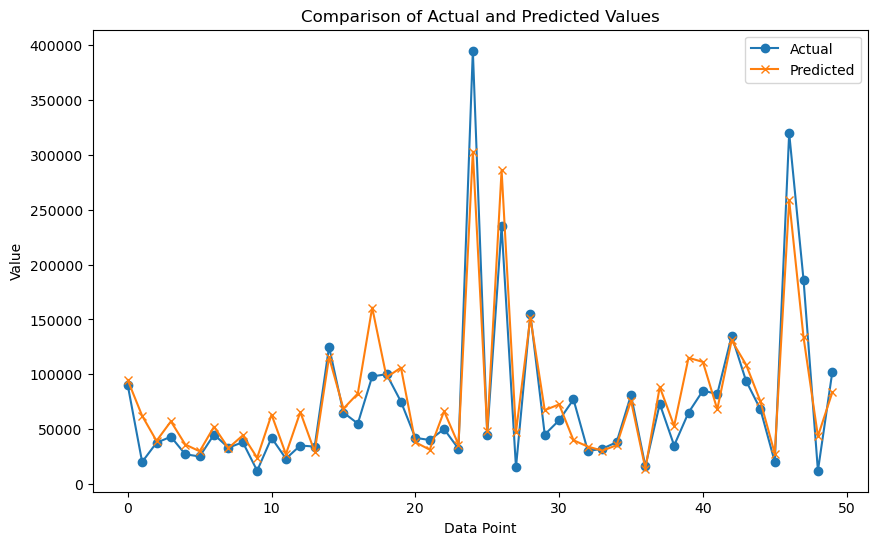

In [35]:
y_test.reset_index(drop=True, inplace=True)

actual_50 = y_test[:50]
pred_50 = y_pred[:50]

plt.figure(figsize=(10, 6))
plt.plot(actual_50, label='Actual', marker='o')
plt.plot(pred_50, label='Predicted', marker='x')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()
plt.show()

Grafik di atas merupakan grafik perbandingan antara nilai *Price* aktual dengan nilai prediksi menggunakan model Extreme Gradient Boosting dengan parameter yang telah di-tuning. Dari grafik di atas dapat ditemukan beberapa hal sebagai berikut.

1. Pemodelan sudah cukup baik dan linier, hal ini dapat dilihat dari grafik dengan bentuk yang hampir linier dan nilai metrik error yang kecil, baik RMSE, MAE, MAPE, dan nilai R2 yang besar (0.80)
2. Beberapa nilai harga aktual yang kecil di atas jika dibandingkan dengan nilai prediksi mengalami error yang cukup banyak, hal ini disebabkan oleh banyaknya data dengan nilai *Price* yang kecil. Hal ini dapat dijadikan masukan untuk pemodelan kedepannya untuk memberikan batas yang lebih tinggi untuk nilai *Price* minimum.

Secara umum, model yang dihasilkan sudah cukup baik berdasarkan matriks evaluasi dan grafik di atas. Berikut ini adalah parameter-parameter yang sangat berpengaruh terhadap penentuan nilai *Price* pada model.

## Feature Importance

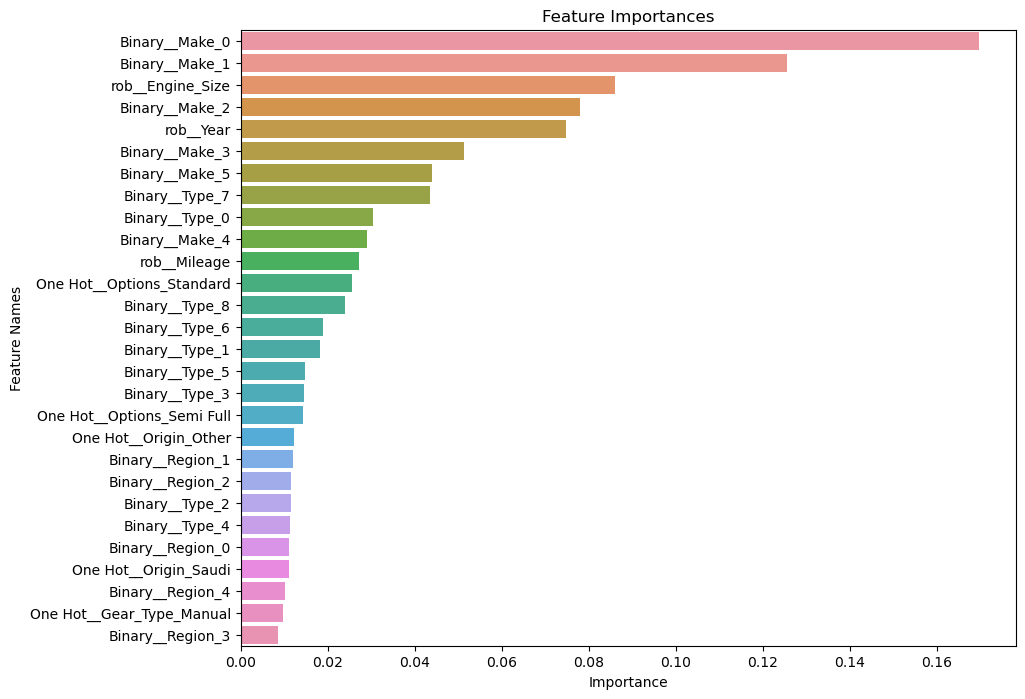

In [28]:
# Assuming transformer is your ColumnTransformer object
feature_names = transformer.get_feature_names_out()

# Creating a DataFrame for feature importances
feature_imp = pd.DataFrame(xgb_tuning['model'].feature_importances_, index=feature_names, columns=['Value']).sort_values(by='Value', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10,8))
sns.barplot(data=feature_imp, x='Value', y=feature_imp.index)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature Names')
plt.show()


Dari fitur-fitur penting di atas, dapat dilihat bahwa fitur *Make*, *Year*, dan *Engine_Size* sangat mempengaruhi model.

# **8. Conclusion**

Dari proses analisa dan modelling yang telah dilakukan, dapat disimpulkan bahwa model yang terbaik untuk memprediksi nilai *Price* dari feature yang dimiliki yaitu menggunakan XGBoost yang telah dilakukan tuning parameter. Dapat dilihat dibawah ini parameter yang **Evaluation Metrics** yang didapatkan dari model.

In [36]:
score_after_tuning

,RMSE,MAE,MAPE,R2
XGB,31338.34955,15767.543973,1.270402,0.802026


Poin-poin Kesimpulan:

1. **RMSE dan MAE**:
   - RMSE: 31338 SAR.
   - MAE: 15767 SAR.
   - Untuk mobil bekas dengan harga tinggi (max *Price* 620000 SAR), nilai error (RMSE dan MAE) terlihat kecil.
   - Untuk mobil bekas dengan harga rendah (min *Price* 500 SAR), nilai error (RMSE dan MAE) sangat besar.
   - Model perlu disempurnakan dengan menetapkan batas nilai minimum yang lebih tinggi pada data *Price*.

2. **MAPE**:
   - MAPE: 1.2%.
   - Kesalahan absolut pada *Price* diprediksi sebesar 1.02%.
   - Tingkat akurasi model mencapai 98%.

3. **R-squared (R2)**:
   - Nilai R2: 0.80.
   - Hubungan antara fitur-fitur (variabel independen) dengan *Price* (variabel dependen) sebesar 80%.
   - Nilai R2 yang tinggi mengindikasikan pengaruh besar variabel independen terhadap variabel dependen.
   - Fitur yang paling berpengaruh dalam pemodelan: *Make*, *Year*, dan *Engine_Size*.

4. **Kegunaan Model**:
   - Model cukup baik untuk memprediksi harga mobil bekas.
   - Berguna bagi penjual dan pembeli mobil bekas.
   - Dapat digunakan oleh website penjualan mobil bekas untuk membantu pengunjung memperkirakan harga jual/beli mobil.
   - Meningkatkan jumlah transaksi di website penjualan mobil bekas.

## Save Model using Pickle

In [33]:
# Save Model
import pickle
file_name = 'saudi_usedcar_model_syahnanda.sav'

pickle.dump(xgb_tuning, open(file_name, 'wb'))

In [41]:
# Load model
file_name = 'saudi_usedcar_model_syahnanda.sav'
loaded_model = pickle.load(open(file_name, 'rb'))

## Test Model with Random Sample

In [45]:
sample_predict = pd.DataFrame({
    'Type':['Camry'],
    'Region':['Al-Medina'],
    'Make':['Toyota'],
    'Gear_Type':['Automatic'],
    'Origin':['Saudi'],
    'Options':['Full'],
    'Year':[2017],
    'Engine_Size':[2.5],
    'Mileage':[77359],
    'Negotiable':['Yes']
})

sample_predict

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable
0,Camry,Al-Medina,Toyota,Automatic,Saudi,Full,2017,2.5,77359,Yes


In [46]:
loaded_model.predict(sample_predict)

array([68724.195], dtype=float32)

# **9. Recommendation**

Rekomendasi yang dapat diberikan di masa depan untuk membuat pemodelan yang lebih baik :

1. Menggunakan model Support Vector Regression dengan melihat penyebab nilai matriks R2 yang sangat kecil(-0.080600 ), hal ini dikarenakan nilai MAPE yang dihasilkan adalah yang terkecil dari setiap model yang dibuat. Sehingga dapat menghasilkan model yang lebih baik.
2. Memberikan batas nilai harga minimum yang lebih tinggi, karena terdapat beberapa error yang besar untuk nilai prediksi *Price* pada harga yang rendah. Atau bisa juga dengan memecah model menjadi 2 jenis untuk harga tinggi dan harga rendah dengan masing-masing model yang berbeda.
3. Menganalisis kolinearitas dari fitur-fitur yang digunakan dalam pemodelan dengan menghitung nilai VIF dari masing-masing fitur. Diharapkan akan diperoleh model yang lebih baik dengan menghilangkan fitur-fitur yang berkorelasi.
4. Menggunakan metode polinomial dan binning pada fitur untuk mendapatkan model yang lebih sensitif.

Rekomendasi Model :
1. Model XGBoost ini dapat digunakan untuk prediksi harga mobil bekas di Saudi Arabia dengan kepercayaan yang cukup tinggi.
2. Disarankan untuk terus memantau dan mengevaluasi kinerja model secara berkala, serta mempertimbangkan untuk mengeksplorasi parameter hyperparameter lainnya atau mencoba teknik pra-pemrosesan data yang berbeda untuk meningkatkan akurasi prediksi.

Rekomendasi Bisnis
1. Karena kepercayaan yang dihasilkan model XGBoost, sangat direkomendasikan untuk menggunakan model ini secara konsisten dalam kegiatan bisnis jual beli mobil dan pembelian mobil untuk memprediksi harga moobil bekas di saudi arabia.
2. Dengan memiliki model prediksi yang akurat, dealer/showroom dapat meningkatkan efisiensi pemasaran dengan menentukan harga penawaran yang optimal untuk mobil yang akan dijual.
3. Dealer/showroom/user dapat menggunakan prediksi harga mobil dari model XGBoost untuk menilai nilai mobil yang akan dibeli. Dengan pemahaman yang lebih baik tentang nilai mobil,  kita dapat menyesuaikan harga penjualan atau melakukan pembelian yang lebih cerdas.

Estimasi Keuntungan Bisnis
1. Keuntungan yang akan didapatkan Dealer/Showroom/User adalah berkurangnya biaya untuk melakukan survey dan negosiasi terlalu lama.



**Terima kasih.**